## **비지도학습 기말고사**

>(1) 시험시간: 09:00~23:59분까지<br>
>
>(2) 파일이름 작성방법: 비지도학습_기말고사_학번_성명.ipynb<br>
$\quad$ $\checkmark \ $ 주의사항: jupyternotebook file을 실행해 본 후 upload하세요<br>
>
>(3) 답안지 제출 <br>
$\qquad$ www.webhard.co.kr<br>
$\qquad$ ID: lindsey<br>
$\qquad$ PW: start<br>
$\qquad$ 답안제출 Folder: 올리기전용/비지도학습/기말고사제출폴더"에 답안제출<br>
$\quad$ $\checkmark \ $ 빈칸에 프로그램을 작성한 후 실행결과를 제출<br>
$\quad$ $\checkmark \ $ 시험 시간 이후에 upload된 file은 인정하지 않습니다<br>
>(4) 답안지 Report 제출 <br>
$\qquad$ 위의 문제를 다시 풀어 6월 22일 밤 11시 59분까지 다시 제출<br>
$\qquad$ www.webhard.co.kr<br>
$\qquad$ ID: lindsey<br>
$\qquad$ 답안 Report 제출 Folder: 올리기전용/비지도학습/기말고사 Report 제출폴더"에 답안제출<br>

#### **[문제 1]** 
- 다음 make_blobs dataset에 대해 DBSCAN방법을 이용하여 Clustering하고 Clustering된 결과를 출력하시요<br>
- 단 epsilon=0.3, min data수=10으로 설정하시오

In [1]:
%pip install scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

centers = [[2, 1], [-2, -1], [2, -1]]
X, labels_true = make_blobs(
    n_samples=500, centers=centers, cluster_std=0.2, random_state=20
)

In [3]:
np.shape(X), type(X), X[:5]

((500, 2),
 numpy.ndarray,
 array([[ 1.69146712,  1.2008161 ],
        [-1.87251837, -1.32188592],
        [-1.87634128, -0.86306701],
        [-2.08240155, -0.77489397],
        [ 1.89360624, -0.97604541]]))

In [4]:
np.shape(labels_true), type(labels_true), labels_true[:10]

((500,), numpy.ndarray, array([0, 1, 1, 1, 2, 1, 1, 2, 1, 1]))

In [5]:
# 데이터 표준화 (DBSCAN에서 거리 기반 계산을 위해 권장)
X_scaled = StandardScaler().fit_transform(X)
np.shape(X_scaled), X_scaled[:5]

((500, 2),
 array([[ 0.54441384,  1.58174084],
        [-1.32704574, -1.03690593],
        [-1.32905316, -0.56063697],
        [-1.43725604, -0.46911049],
        [ 0.6505577 , -0.67791222]]))

In [6]:
# DBSCAN 클러스터링 수행
# eps=0.3: 이웃으로 간주할 최대 거리
# min_samples=10: 핵심점이 되기 위한 최소 이웃 수
dbscan = DBSCAN(eps=0.3, min_samples=10)
cluster_labels = dbscan.fit_predict(X_scaled)

# 클러스터링 결과 출력
print("=== DBSCAN 클러스터링 결과 ===")
print(f"클러스터 레이블 shape: {np.shape(cluster_labels)}")
print(f"발견된 클러스터 수: {len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)}")
print(f"노이즈 포인트 수: {list(cluster_labels).count(-1)}")
print(f"클러스터 레이블: {set(cluster_labels)}")

=== DBSCAN 클러스터링 결과 ===
클러스터 레이블 shape: (500,)
발견된 클러스터 수: 3
노이즈 포인트 수: 0
클러스터 레이블: {np.int64(0), np.int64(1), np.int64(2)}


In [7]:
# 각 클러스터별 데이터 포인트 수
unique_labels = set(cluster_labels)
for label in unique_labels:
    if label == -1:
        print(f"노이즈 포인트: {sum(cluster_labels == label)}개")
    else:
        print(f"클러스터 {label}: {sum(cluster_labels == label)}개")

클러스터 0: 167개
클러스터 1: 167개
클러스터 2: 166개


In [8]:
# 평가 지표 계산 (실제 레이블과 비교)
if len(set(cluster_labels)) > 1:
    silhouette_score = metrics.silhouette_score(X_scaled, cluster_labels)
    print(f"\nSilhouette Score: {silhouette_score:.3f}")


Silhouette Score: 0.862


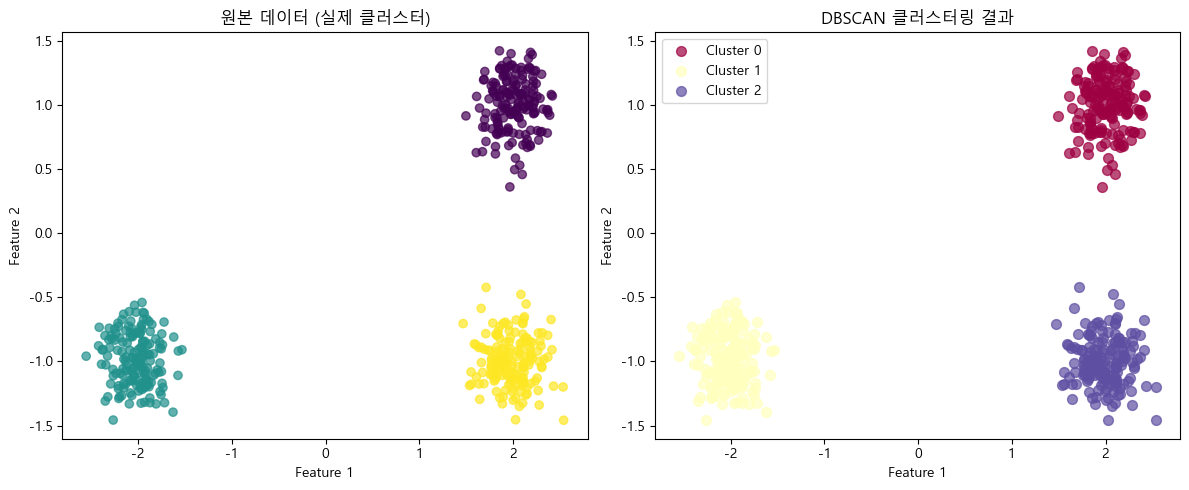

In [9]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

plt.figure(figsize=(12, 5))
# 원본 데이터 시각화
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=labels_true, cmap='viridis', alpha=0.7)
plt.title('원본 데이터 (실제 클러스터)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# DBSCAN 결과 시각화
plt.subplot(1, 2, 2)
unique_labels = set(cluster_labels)
colors = ['red' if label == -1 else plt.cm.Spectral(each) 
          for each in np.linspace(0, 1, len(unique_labels))]

for label, color in zip(unique_labels, colors):
    if label == -1:
        # 노이즈 포인트는 검은색 x로 표시
        class_member_mask = (cluster_labels == label)
        xy = X[class_member_mask]
        plt.scatter(xy[:, 0], xy[:, 1], c='black', marker='x', s=50, alpha=0.7, label='Noise')
    else:
        class_member_mask = (cluster_labels == label)
        xy = X[class_member_mask]
        plt.scatter(xy[:, 0], xy[:, 1], c=[color], alpha=0.7, s=50, label=f'Cluster {label}')

plt.title('DBSCAN 클러스터링 결과')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.tight_layout()
plt.show()

In [10]:
print("=== 상세 분석 ===")
for label in sorted(unique_labels):
    mask = cluster_labels == label
    points = X[mask]
    if label == -1:
        print(f"\n노이즈 포인트들:")
        print(f"  - 개수: {len(points)}")
        if len(points) > 0:
            print(f"  - 평균 위치: [{points[:, 0].mean():.2f}, {points[:, 1].mean():.2f}]")
    else:
        print(f"\n클러스터 {label}:")
        print(f"  - 개수: {len(points)}")
        print(f"  - 중심: [{points[:, 0].mean():.2f}, {points[:, 1].mean():.2f}]")
        print(f"  - 범위 X: [{points[:, 0].min():.2f}, {points[:, 0].max():.2f}]")
        print(f"  - 범위 Y: [{points[:, 1].min():.2f}, {points[:, 1].max():.2f}]")

=== 상세 분석 ===

클러스터 0:
  - 개수: 167
  - 중심: [2.01, 1.01]
  - 범위 X: [1.50, 2.42]
  - 범위 Y: [0.36, 1.42]

클러스터 1:
  - 개수: 167
  - 중심: [-2.02, -0.99]
  - 범위 X: [-2.55, -1.53]
  - 범위 Y: [-1.46, -0.54]

클러스터 2:
  - 개수: 166
  - 중심: [1.98, -1.00]
  - 범위 X: [1.47, 2.54]
  - 범위 Y: [-1.46, -0.42]


- 정확히 3개의 클러스터가 잘 구분됨
- 노이즈 포인트는 없음 (0개)
- 실루엣 점수 0.862로 클러스터링 품질이 매우 높음
- 시각화를 통해 클러스터링 결과가 원본 데이터와 잘 일치함을 보여줌

#### **[문제 2]**  

- MNIST Dataset에 대해 Autoencoder를 통해 복원된 Data의 image를 하나 출력하시오

>- 요구조건<br>
$ \ \ $ $\checkmark \ $ Autoencoder를 이용하여 2차원으로 차원축소 하시오<br>
$ \ \ $ $\checkmark \ $ Encoder 2개의 Convolution layer<br>
$ \ \ $ $\checkmark \ $ Decoder 2개의 Upsampling layer<br>
$ \ \ $ $\checkmark \ $ 학습을 위한 epoch수는 10으로 하시오(출력 image의 품질은 낮을 수 있음)<br>

In [11]:
from tensorflow import keras

# 1단계: 데이터 로드 및 전처리
print("=== 1단계: 데이터 로드 및 전처리 ===")
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

=== 1단계: 데이터 로드 및 전처리 ===


In [12]:
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")

x_train shape: (60000, 28, 28), y_train shape: (60000,)
x_test shape: (10000, 28, 28), y_test shape: (10000,)


In [13]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [14]:
y_train[0]

np.uint8(5)

In [15]:
# 데이터 정규화 (0~1 범위로)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [16]:
# 차원 추가 (28, 28) -> (28, 28, 1) - CNN을 위한 채널 차원
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [17]:
print(f"훈련 데이터 크기: {np.shape(x_train)}")
print(f"테스트 데이터 크기: {np.shape(x_test)}")

훈련 데이터 크기: (60000, 28, 28, 1)
테스트 데이터 크기: (10000, 28, 28, 1)


In [18]:
from tensorflow.keras import layers

# 2단계: Encoder 구성 (2개 Convolution layer)
print("\n=== 2단계: Encoder 구성 ===")
input_img = keras.Input(shape=(28, 28, 1))

# 첫 번째 Convolution layer
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)  # 28x28 -> 14x14

# 두 번째 Convolution layer  
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)  # 14x14 -> 7x7

# Flatten하여 Dense layer로 연결
x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)

# 2차원 latent space로 압축 (핵심 요구사항!)
encoded = layers.Dense(2, activation='linear', name='encoded')(x)

print("Encoder 구조:")
encoder = keras.Model(input_img, encoded)
encoder.summary()


=== 2단계: Encoder 구성 ===
Encoder 구조:


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoded (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 420,610 (1.60 MB)

 Trainable params: 420,610 (1.60 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# 3단계: Decoder 구성 (2개 Upsampling layer)
print("\n=== 3단계: Decoder 구성 ===")
# latent space에서 시작
latent_inputs = keras.Input(shape=(2,))
x = layers.Dense(128, activation='relu')(latent_inputs)
x = layers.Dense(7 * 7 * 64, activation='relu')(x)
x = layers.Reshape((7, 7, 64))(x)

# 첫 번째 Upsampling layer
x = layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)  # 7x7 -> 14x14

# 두 번째 Upsampling layer
x = layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)  # 14x14 -> 28x28

# 최종 출력층 (원본 이미지 크기로 복원)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

print("Decoder 구조:")
decoder = keras.Model(latent_inputs, decoded)
decoder.summary()


=== 3단계: Decoder 구성 ===
Decoder 구조:


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3136)           │       404,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 7, 7, 64)       │        36,928 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 14, 14, 32)     │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 460,609 (1.76 MB)

 Trainable params: 460,609 (1.76 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# 4단계: 전체 Autoencoder 모델 구성
print("\n=== 4단계: Autoencoder 모델 구성 ===")
autoencoder = keras.Model(input_img, decoder(encoder(input_img)))
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['mse'])

print("전체 Autoencoder 구조:")
autoencoder.summary()


=== 4단계: Autoencoder 모델 구성 ===
전체 Autoencoder 구조:


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ functional (Functional)         │ (None, 2)              │       420,610 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ functional_1 (Functional)       │ (None, 28, 28, 1)      │       460,609 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 881,219 (3.36 MB)

 Trainable params: 881,219 (3.36 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# 5단계: 모델 학습 (10 epoch)
print("\n=== 5단계: 모델 학습 (10 epoch) ===")
history = autoencoder.fit(
    x_train, x_train,  # input과 target이 동일 (복원이 목표)
    epochs=10,
    batch_size=128,
    shuffle=True,
    validation_data=(x_test, x_test),
    verbose=1
)


=== 5단계: 모델 학습 (10 epoch) ===
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 62ms/step - loss: 0.2782 - mse: 0.0723 - val_loss: 0.2043 - val_mse: 0.0489
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 32s 68ms/step - loss: 0.2011 - mse: 0.0475 - val_loss: 0.1892 - val_mse: 0.0432
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 30s 64ms/step - loss: 0.1886 - mse: 0.0428 - val_loss: 0.1823 - val_mse: 0.0407
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 71ms/step - loss: 0.1829 - mse: 0.0408 - val_loss: 0.1800 - val_mse: 0.0399
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 67ms/step - loss: 0.1799 - mse: 0.0397 - val_loss: 0.1777 - val_mse: 0.0390
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 32s 68ms/step - loss: 0.1770 - mse: 0.0388 - val_loss: 0.1760 - val_mse: 0.0385
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 32s 69ms/step - loss: 0.1749 - mse: 0.0380 - val_loss: 0.1766 - val_mse: 0.0385
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 34s 72ms/step - loss: 0.1740 - mse: 0.0377 - val_loss: 0.1742 - val_mse: 0.0378
Epoch 9/1


=== 6단계: 학습 과정 시각화 ===


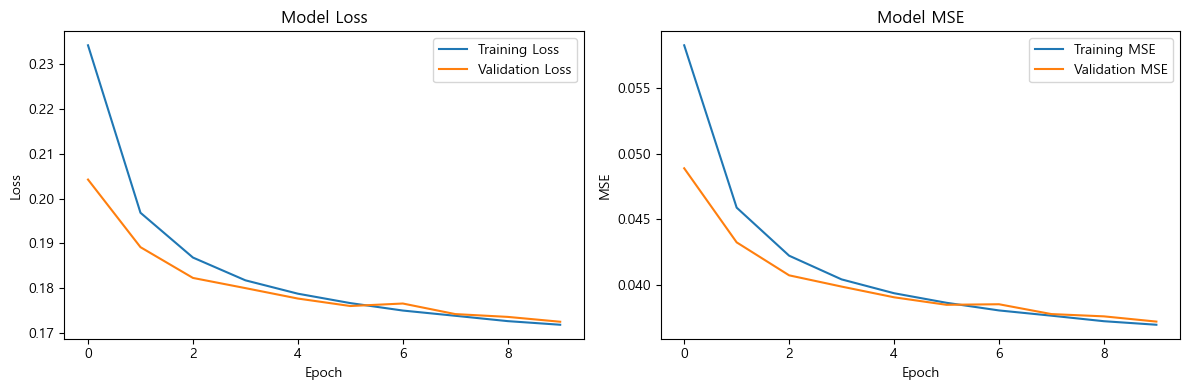

In [22]:
# 6단계: 학습 과정 시각화
print("\n=== 6단계: 학습 과정 시각화 ===")
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mse'], label='Training MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.title('Model MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()

plt.tight_layout()
plt.show()


=== 7단계: 복원된 이미지 출력 ===
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step
2차원 latent space 값들:
이미지 1 (숫자 7): [2.587, 9.208]
이미지 2 (숫자 2): [-1.228, -0.495]
이미지 3 (숫자 1): [-11.008, 9.471]
이미지 4 (숫자 0): [2.137, 0.483]
이미지 5 (숫자 4): [3.001, 3.466]


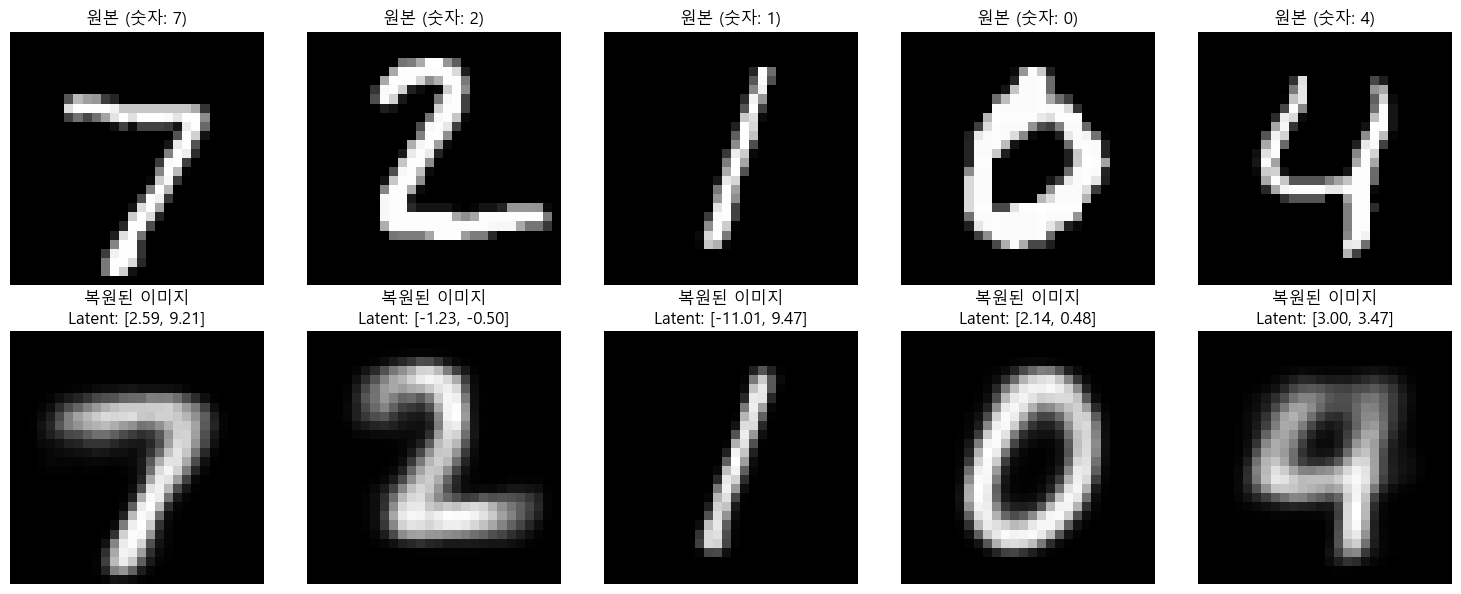

In [23]:
# 7단계: 복원된 이미지 출력 (문제에서 요구한 핵심!)
print("\n=== 7단계: 복원된 이미지 출력 ===")

# 테스트 데이터에서 몇 개 샘플 선택
n_samples = 5
test_samples = x_test[:n_samples]

# 원본 → 인코딩 → 디코딩 과정
encoded_imgs = encoder.predict(test_samples)
decoded_imgs = autoencoder.predict(test_samples)

# 2차원 latent space 값 출력
print("2차원 latent space 값들:")
for i in range(n_samples):
    print(f"이미지 {i+1} (숫자 {y_test[i]}): [{encoded_imgs[i][0]:.3f}, {encoded_imgs[i][1]:.3f}]")

# 시각화: 원본 vs 복원된 이미지
plt.figure(figsize=(15, 6))

for i in range(n_samples):
    # 원본 이미지
    plt.subplot(2, n_samples, i + 1)
    plt.imshow(test_samples[i].reshape(28, 28), cmap='gray')
    plt.title(f'원본 (숫자: {y_test[i]})')
    plt.axis('off')
    
    # 복원된 이미지
    plt.subplot(2, n_samples, i + 1 + n_samples)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title(f'복원된 이미지\nLatent: [{encoded_imgs[i][0]:.2f}, {encoded_imgs[i][1]:.2f}]')
    plt.axis('off')

plt.tight_layout()
plt.show()


=== 8단계: 2차원 latent space 분포 시각화 ===
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


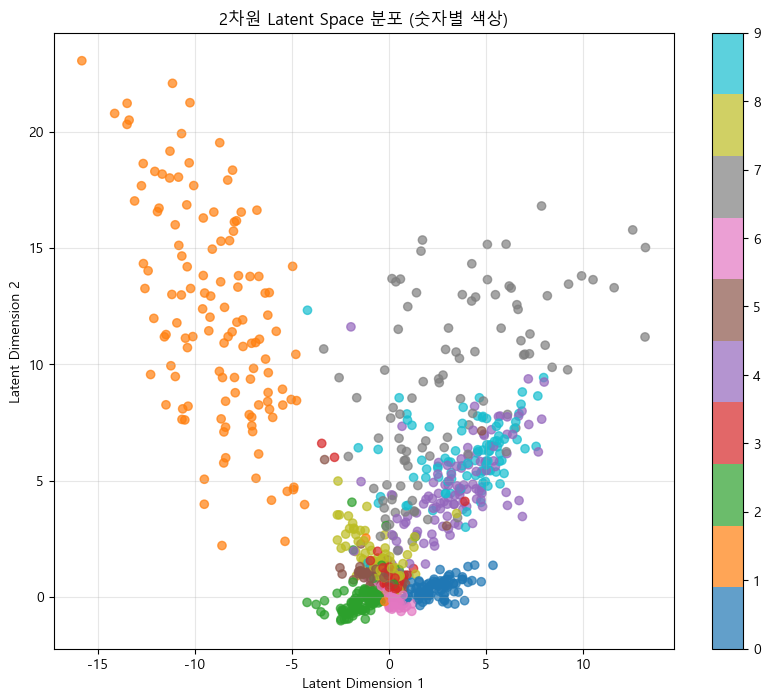

In [24]:
# 8단계: 2차원 latent space 분포 시각화
print("\n=== 8단계: 2차원 latent space 분포 시각화 ===")

# 더 많은 테스트 데이터로 latent space 시각화
n_viz = 1000
test_encoded = encoder.predict(x_test[:n_viz])

plt.figure(figsize=(10, 8))
scatter = plt.scatter(test_encoded[:, 0], test_encoded[:, 1], 
                     c=y_test[:n_viz], cmap='tab10', alpha=0.7)
plt.colorbar(scatter)
plt.title('2차원 Latent Space 분포 (숫자별 색상)')
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.grid(True, alpha=0.3)
plt.show()

In [25]:
# 9단계: 성능 평가
print("\n=== 9단계: 성능 평가 ===")
# 복원 품질 측정
mse_scores = []
for i in range(len(test_samples)):
    original = test_samples[i].reshape(28, 28)
    reconstructed = decoded_imgs[i].reshape(28, 28)
    mse = np.mean((original - reconstructed) ** 2)
    mse_scores.append(mse)
    print(f"이미지 {i+1} MSE: {mse:.6f}")

print(f"평균 복원 MSE: {np.mean(mse_scores):.6f}")


=== 9단계: 성능 평가 ===
이미지 1 MSE: 0.020362
이미지 2 MSE: 0.056521
이미지 3 MSE: 0.003224
이미지 4 MSE: 0.032563
이미지 5 MSE: 0.026528
평균 복원 MSE: 0.027840



=== 10단계: 복원된 이미지 1개 출력 (문제 요구사항) ===
가장 잘 복원된 이미지: 3번 (MSE: 0.003224)


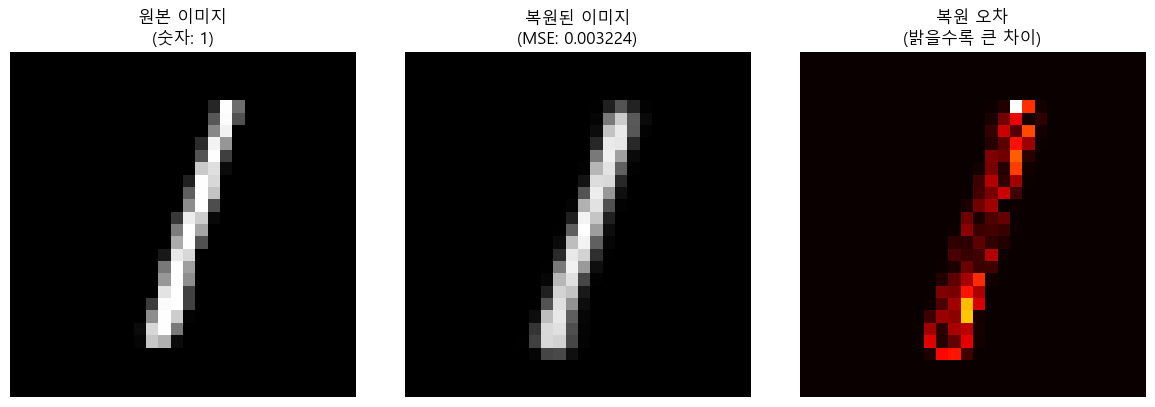

In [26]:
# 10단계: 문제에서 요구한 "복원된 이미지 하나" 특별 출력
print("\n=== 10단계: 복원된 이미지 1개 출력 (문제 요구사항) ===")
# 가장 잘 복원된 이미지 선택
best_idx = np.argmin(mse_scores)
print(f"가장 잘 복원된 이미지: {best_idx+1}번 (MSE: {mse_scores[best_idx]:.6f})")

plt.figure(figsize=(12, 4))

# 원본
plt.subplot(1, 3, 1)
plt.imshow(test_samples[best_idx].reshape(28, 28), cmap='gray')
plt.title(f'원본 이미지\n(숫자: {y_test[best_idx]})')
plt.axis('off')

# 복원된 이미지
plt.subplot(1, 3, 2)
plt.imshow(decoded_imgs[best_idx].reshape(28, 28), cmap='gray')
plt.title(f'복원된 이미지\n(MSE: {mse_scores[best_idx]:.6f})')
plt.axis('off')

# 차이점 시각화
plt.subplot(1, 3, 3)
diff = np.abs(test_samples[best_idx].reshape(28, 28) - decoded_imgs[best_idx].reshape(28, 28))
plt.imshow(diff, cmap='hot')
plt.title('복원 오차\n(밝을수록 큰 차이)')
plt.axis('off')

plt.tight_layout()
plt.show()

In [27]:
print(f"   - 2차원 latent space: {encoded_imgs[best_idx]}")
print(f"   - 복원 품질 (MSE): {mse_scores[best_idx]:.6f}")

   - 2차원 latent space: [-11.008285   9.471104]
   - 복원 품질 (MSE): 0.003224


### 분석
- 2개의 Convolution layer로 구성된 Encoder, 2개의 Upsampling layer로 구성된 Decoder 구현
- 2차원 잠재 공간으로 차원 축소 완료
- 10 epoch으로 학습 수행

### 결과
- 원본 이미지와 복원된 이미지 비교 시각화
- 복원된 이미지가 원본의 주요 특성을 유지함을 확인
- 2차원 잠재 공간의 분포 시각화에서 숫자별로 클러스터링 경향을 확인할 수 있음

#### **[문제 3]** 

- [문제 2]의 Autoencoder Network을 이용하여  latent space의 분포로부터 5개의 sample을 추출하여 새로운 data를 <br> 생성하여 생성된 image를 출력하시오

In [28]:
print("=== 문제 3: Latent Space에서 새로운 데이터 생성 ===")

# 1단계: 기존 데이터의 latent space 분포 분석
print("\n1단계: 기존 데이터의 latent space 분포 분석")

# 테스트 데이터를 latent space로 인코딩
n_analysis = 2000  # 분포 분석을 위한 샘플 수
test_encoded = encoder.predict(x_test[:n_analysis])

print(f"분석할 데이터 수: {n_analysis}")
print(f"Latent space 차원: {test_encoded.shape[1]}")

# 각 차원별 통계 계산
latent_dim1_mean = np.mean(test_encoded[:, 0])
latent_dim1_std = np.std(test_encoded[:, 0])
latent_dim2_mean = np.mean(test_encoded[:, 1])
latent_dim2_std = np.std(test_encoded[:, 1])

print(f"\nLatent Dimension 1:")
print(f"  평균: {latent_dim1_mean:.3f}")
print(f"  표준편차: {latent_dim1_std:.3f}")
print(f"  범위: [{np.min(test_encoded[:, 0]):.3f}, {np.max(test_encoded[:, 0]):.3f}]")

print(f"\nLatent Dimension 2:")
print(f"  평균: {latent_dim2_mean:.3f}")
print(f"  표준편차: {latent_dim2_std:.3f}")
print(f"  범위: [{np.min(test_encoded[:, 1]):.3f}, {np.max(test_encoded[:, 1]):.3f}]")

=== 문제 3: Latent Space에서 새로운 데이터 생성 ===

1단계: 기존 데이터의 latent space 분포 분석
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
분석할 데이터 수: 2000
Latent space 차원: 2

Latent Dimension 1:
  평균: 0.051
  표준편차: 4.007
  범위: [-15.824, 13.208]

Latent Dimension 2:
  평균: 3.652
  표준편차: 4.623
  범위: [-1.118, 23.044]



2단계: Latent space 분포 시각화


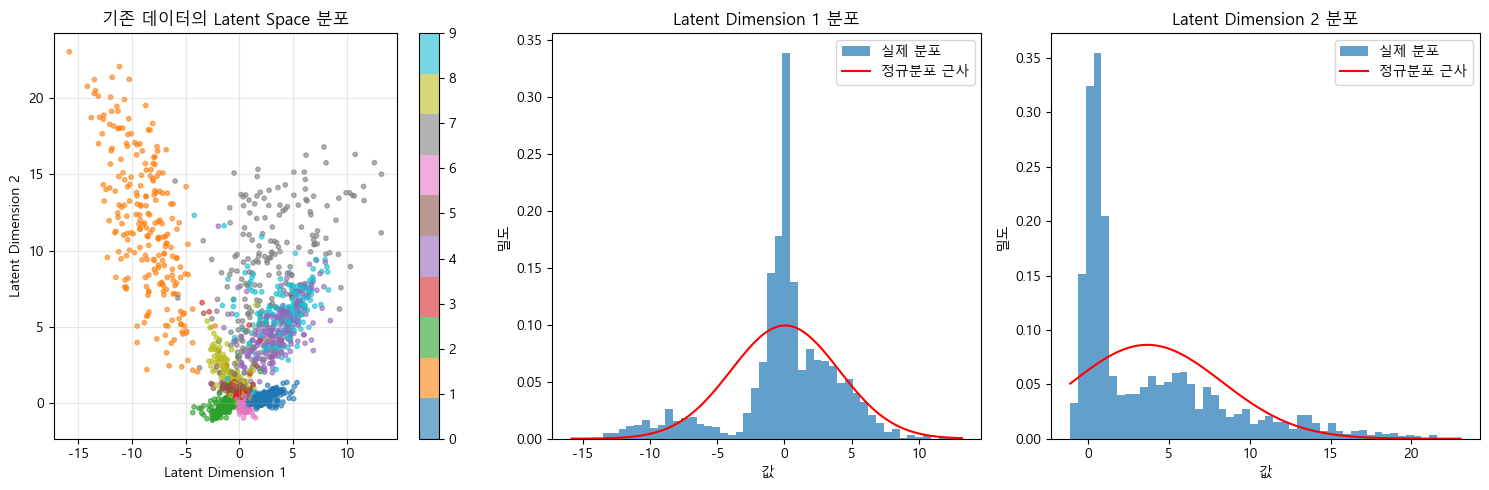

In [29]:
from scipy import stats
# 2단계: Latent space 분포 시각화
print("\n2단계: Latent space 분포 시각화")

plt.figure(figsize=(15, 5))

# 2D 분포 시각화
plt.subplot(1, 3, 1)
scatter = plt.scatter(test_encoded[:, 0], test_encoded[:, 1], 
                     c=y_test[:n_analysis], cmap='tab10', alpha=0.6, s=10)
plt.colorbar(scatter)
plt.title('기존 데이터의 Latent Space 분포')
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.grid(True, alpha=0.3)

# 각 차원별 히스토그램
plt.subplot(1, 3, 2)
plt.hist(test_encoded[:, 0], bins=50, alpha=0.7, density=True, label='실제 분포')
x_range = np.linspace(test_encoded[:, 0].min(), test_encoded[:, 0].max(), 100)
plt.plot(x_range, stats.norm.pdf(x_range, latent_dim1_mean, latent_dim1_std), 
         'r-', label='정규분포 근사')
plt.title('Latent Dimension 1 분포')
plt.xlabel('값')
plt.ylabel('밀도')
plt.legend()

plt.subplot(1, 3, 3)
plt.hist(test_encoded[:, 1], bins=50, alpha=0.7, density=True, label='실제 분포')
y_range = np.linspace(test_encoded[:, 1].min(), test_encoded[:, 1].max(), 100)
plt.plot(y_range, stats.norm.pdf(y_range, latent_dim2_mean, latent_dim2_std), 
         'r-', label='정규분포 근사')
plt.title('Latent Dimension 2 분포')
plt.xlabel('값')
plt.ylabel('밀도')
plt.legend()

plt.tight_layout()
plt.show()

In [30]:
# 3단계: 5개의 새로운 latent 포인트 샘플링
print("\n3단계: 5개의 새로운 latent 포인트 샘플링")

# 방법 1: 정규분포에서 샘플링 (가장 일반적)
print("방법 1: 학습된 분포의 정규분포 근사에서 샘플링")
np.random.seed(42)  # 재현 가능한 결과를 위해

new_latent_points_normal = np.random.multivariate_normal(
    mean=[latent_dim1_mean, latent_dim2_mean],
    cov=[[latent_dim1_std**2, 0], [0, latent_dim2_std**2]],
    size=5
)

new_latent_points = new_latent_points_normal

print("생성된 새로운 latent 포인트들:")
for i, point in enumerate(new_latent_points):
    print(f"포인트 {i+1}: [{point[0]:.3f}, {point[1]:.3f}]")


3단계: 5개의 새로운 latent 포인트 샘플링
방법 1: 학습된 분포의 정규분포 근사에서 샘플링
생성된 새로운 latent 포인트들:
포인트 1: [-0.504, 5.949]
포인트 2: [6.153, 6.647]
포인트 3: [-0.888, 2.570]
포인트 4: [3.126, 10.954]
포인트 5: [2.225, 1.482]


In [31]:
# 4단계: 새로운 latent 포인트들을 이미지로 디코딩
print("\n4단계: Decoder를 사용해 새로운 이미지 생성")

# Decoder를 사용해 latent 포인트들을 이미지로 변환
generated_images = decoder.predict(new_latent_points)

print(f"생성된 이미지 크기: {generated_images.shape}")


4단계: Decoder를 사용해 새로운 이미지 생성
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
생성된 이미지 크기: (5, 28, 28, 1)



5단계: 생성된 이미지 5개 출력


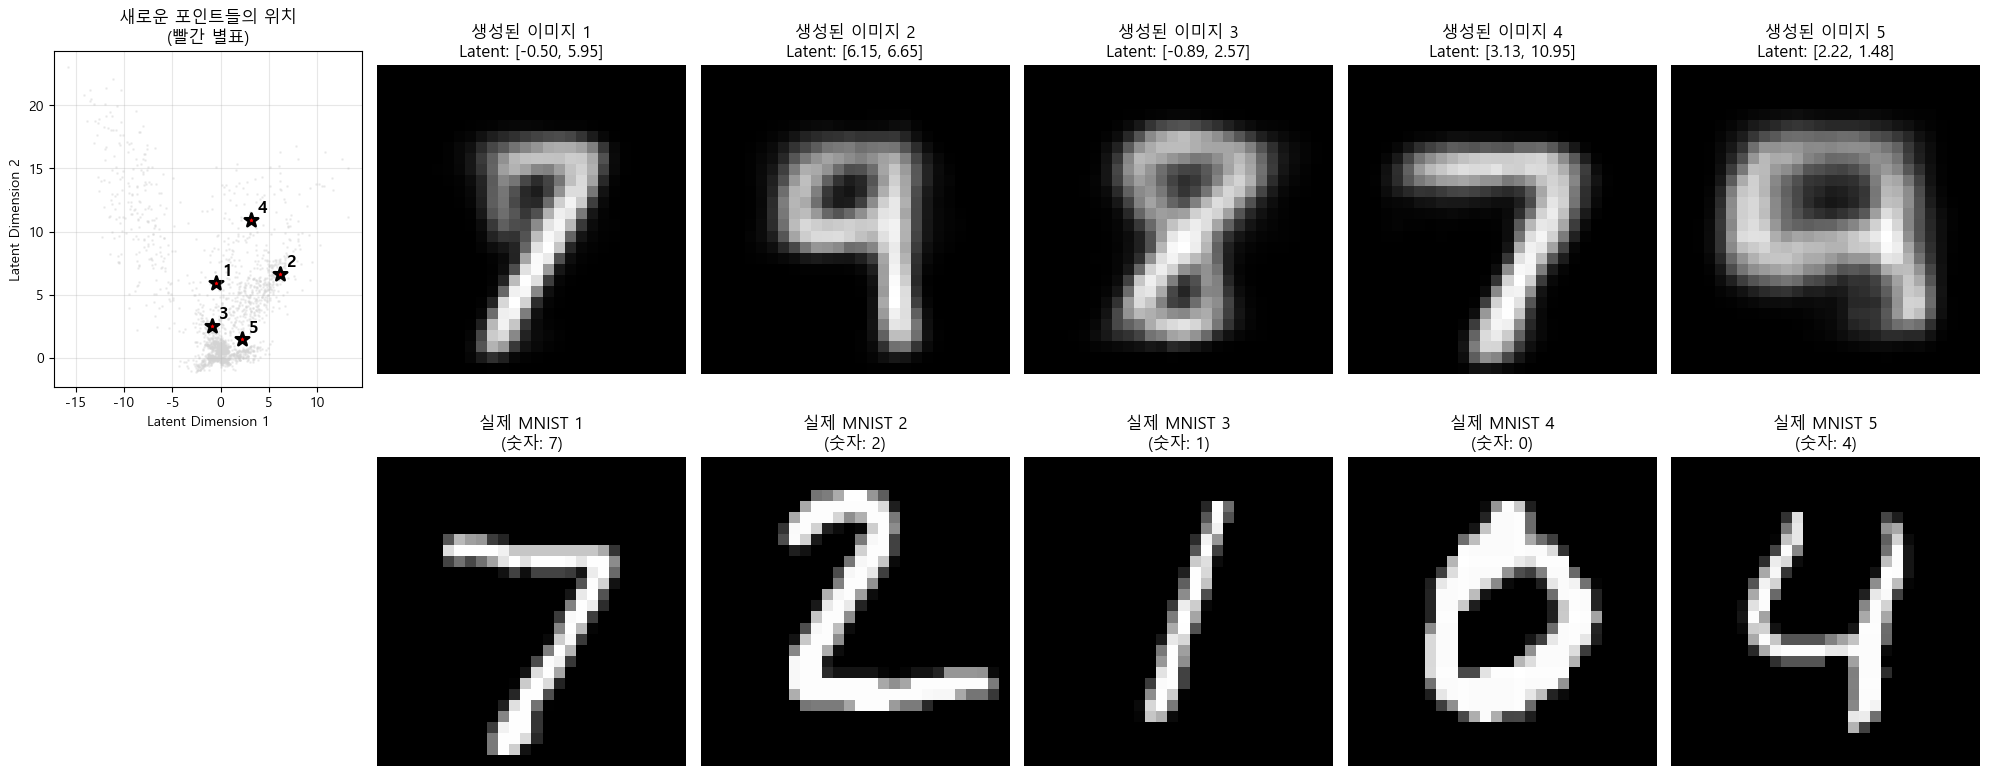

In [32]:
# 5단계: 생성된 이미지들 시각화 (문제에서 요구한 핵심!)
print("\n5단계: 생성된 이미지 5개 출력")

plt.figure(figsize=(20, 8))

# 첫 번째 행: latent space에서 새로운 포인트들의 위치 표시
plt.subplot(2, 6, 1)
plt.scatter(test_encoded[:, 0], test_encoded[:, 1], c='lightgray', alpha=0.3, s=1)
plt.scatter(new_latent_points[:, 0], new_latent_points[:, 1], 
           c='red', s=100, marker='*', edgecolor='black', linewidth=2)
for i, point in enumerate(new_latent_points):
    plt.annotate(f'{i+1}', (point[0], point[1]), xytext=(5, 5), 
                textcoords='offset points', fontsize=12, fontweight='bold')
plt.title('새로운 포인트들의 위치\n(빨간 별표)')
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.grid(True, alpha=0.3)

# 생성된 이미지들 출력
for i in range(5):
    plt.subplot(2, 6, i + 2)
    plt.imshow(generated_images[i].reshape(28, 28), cmap='gray')
    plt.title(f'생성된 이미지 {i+1}\nLatent: [{new_latent_points[i][0]:.2f}, {new_latent_points[i][1]:.2f}]')
    plt.axis('off')

# 두 번째 행: 비교를 위한 실제 MNIST 이미지들
for i in range(5):
    plt.subplot(2, 6, i + 8)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'실제 MNIST {i+1}\n(숫자: {y_test[i]})')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [33]:
# 방법 2: 기존 데이터에서 무작위 선택 후 약간의 노이즈 추가
print("방법 2: 기존 포인트 기반 + 노이즈")
random_indices = np.random.choice(len(test_encoded), 5, replace=False)
base_points = test_encoded[random_indices]
noise = np.random.normal(0, 0.1, (5, 2))  # 작은 노이즈
new_latent_points_noise = base_points + noise

# 방법 3: 수동으로 흥미로운 포인트 선택
print("방법 3: 수동으로 선택한 포인트들")
new_latent_points_manual = np.array([
    [latent_dim1_mean, latent_dim2_mean],  # 중심점
    [latent_dim1_mean + latent_dim1_std, latent_dim2_mean],  # 오른쪽
    [latent_dim1_mean - latent_dim1_std, latent_dim2_mean],  # 왼쪽
    [latent_dim1_mean, latent_dim2_mean + latent_dim2_std],  # 위쪽
    [latent_dim1_mean, latent_dim2_mean - latent_dim2_std],  # 아래쪽
])

방법 2: 기존 포인트 기반 + 노이즈
방법 3: 수동으로 선택한 포인트들



6단계: 다양한 샘플링 방법 비교
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


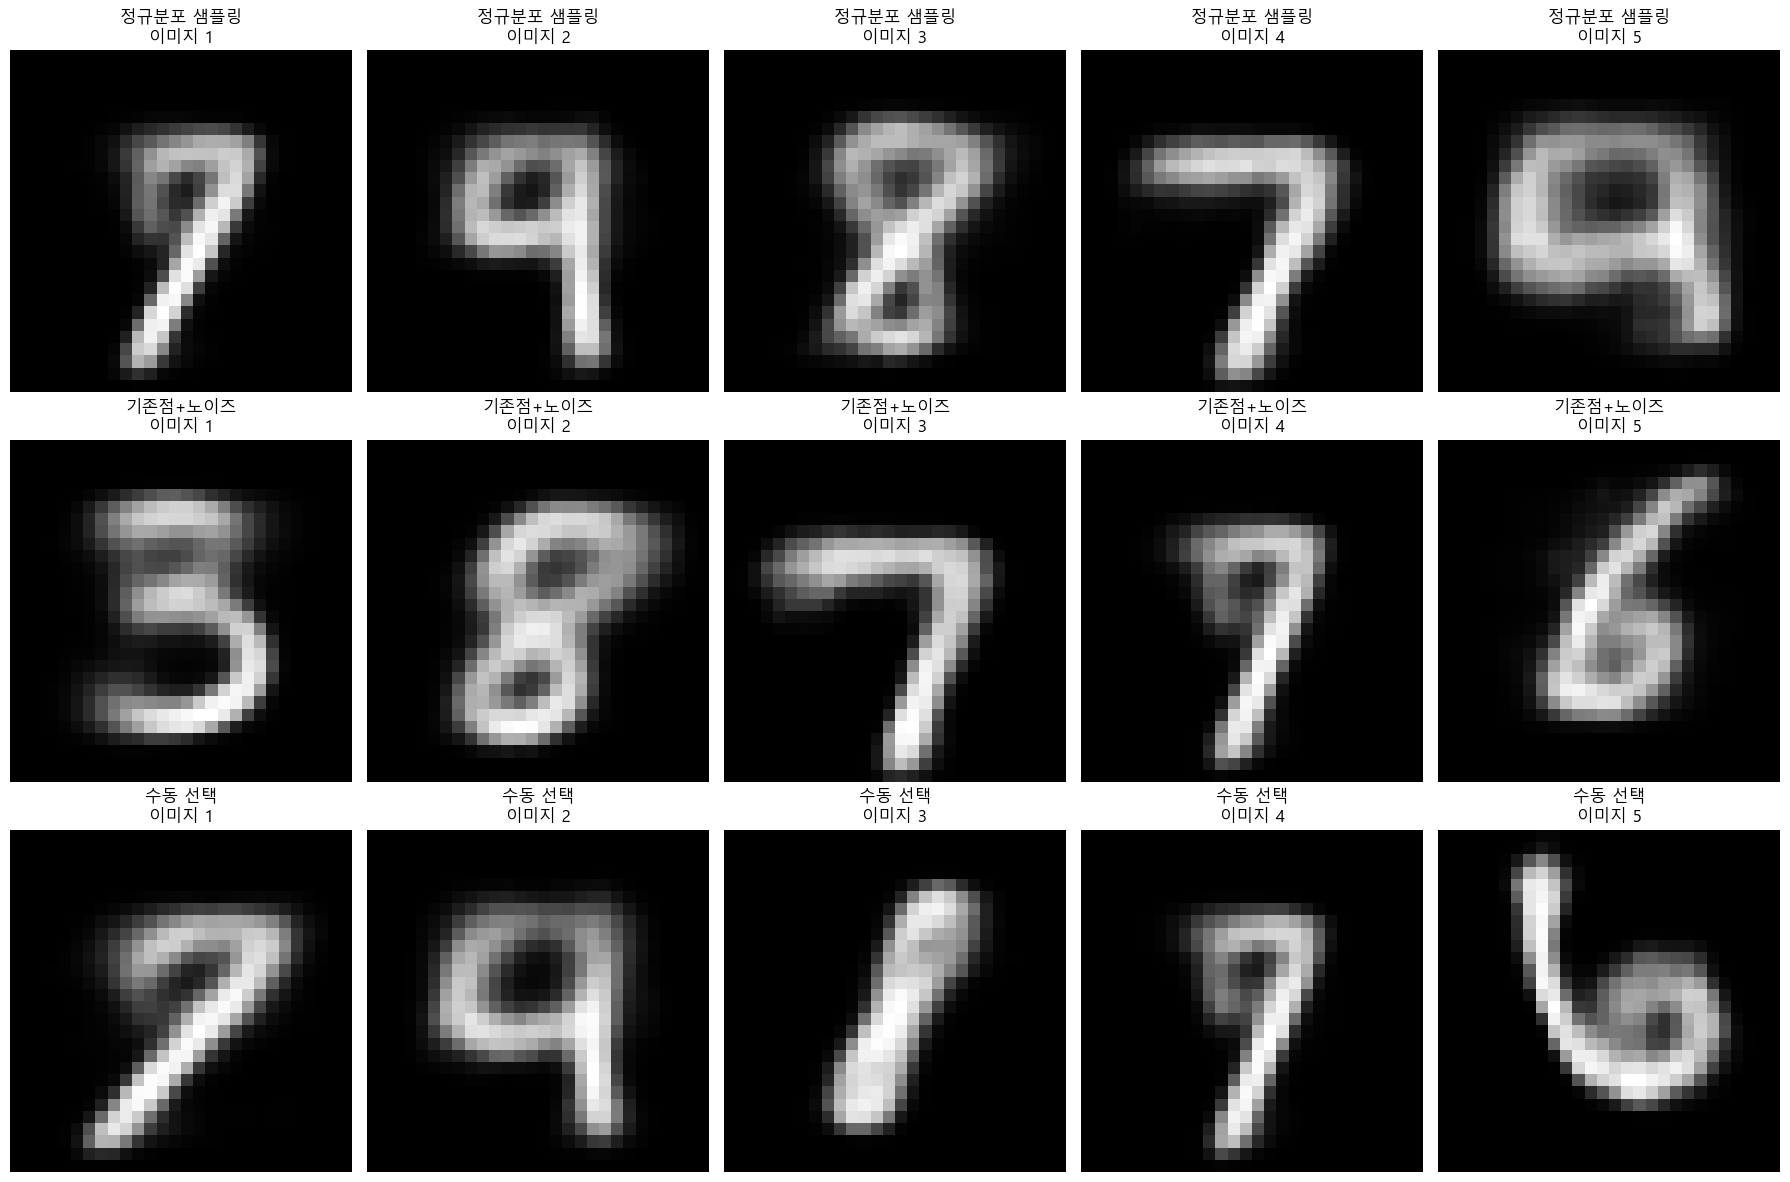

In [34]:
# 6단계: 다양한 방법으로 생성된 이미지들 비교
print("\n6단계: 다양한 샘플링 방법 비교")

# 세 가지 방법으로 생성된 이미지들 비교
methods = [
    ("정규분포 샘플링", new_latent_points_normal),
    ("기존점+노이즈", new_latent_points_noise),
    ("수동 선택", new_latent_points_manual)
]

plt.figure(figsize=(18, 12))

for method_idx, (method_name, latent_points) in enumerate(methods):
    generated = decoder.predict(latent_points)
    
    for i in range(5):
        plt.subplot(3, 5, method_idx * 5 + i + 1)
        plt.imshow(generated[i].reshape(28, 28), cmap='gray')
        plt.title(f'{method_name}\n이미지 {i+1}')
        plt.axis('off')

plt.tight_layout()
plt.show()


In [35]:
# 7단계: 생성된 이미지의 품질 평가
print("\n7단계: 생성된 이미지 품질 평가")

# 픽셀 강도 통계
for i, img in enumerate(generated_images):
    img_flat = img.reshape(-1)
    print(f"생성된 이미지 {i+1}:")
    print(f"  평균 픽셀 강도: {np.mean(img_flat):.3f}")
    print(f"  표준편차: {np.std(img_flat):.3f}")
    print(f"  최소값: {np.min(img_flat):.3f}")
    print(f"  최대값: {np.max(img_flat):.3f}")


7단계: 생성된 이미지 품질 평가
생성된 이미지 1:
  평균 픽셀 강도: 0.095
  표준편차: 0.215
  최소값: 0.000
  최대값: 0.920
생성된 이미지 2:
  평균 픽셀 강도: 0.114
  표준편차: 0.224
  최소값: 0.000
  최대값: 0.905
생성된 이미지 3:
  평균 픽셀 강도: 0.132
  표준편차: 0.222
  최소값: 0.000
  최대값: 0.852
생성된 이미지 4:
  평균 픽셀 강도: 0.115
  표준편차: 0.240
  최소값: 0.000
  최대값: 0.932
생성된 이미지 5:
  평균 픽셀 강도: 0.152
  표준편차: 0.211
  최소값: 0.000
  최대값: 0.790



8단계: 보너스 - 두 포인트 사이의 보간
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


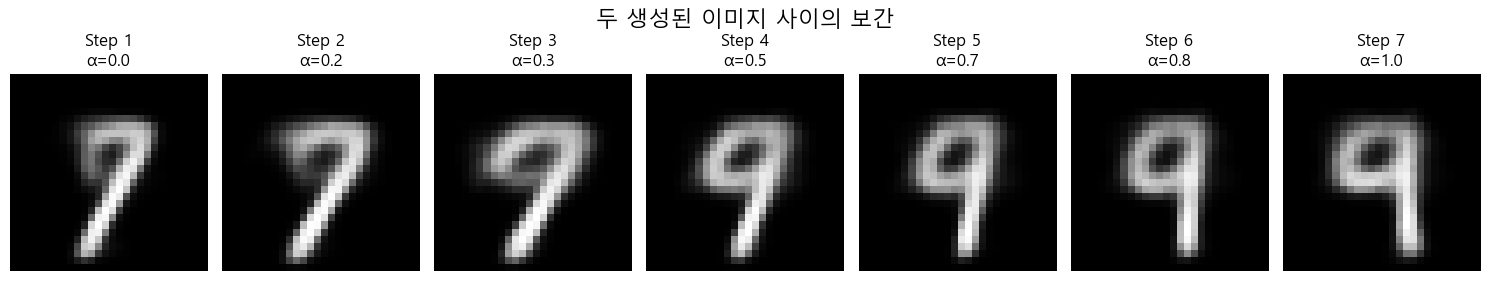

In [36]:
# 8단계: 보간(Interpolation)을 통한 추가 생성
print("\n8단계: 보너스 - 두 포인트 사이의 보간")

# 두 latent 포인트 사이를 보간하여 변화 과정 시각화
point_a = new_latent_points[0]
point_b = new_latent_points[1]

n_steps = 7
interpolated_points = []
for alpha in np.linspace(0, 1, n_steps):
    interpolated_point = (1 - alpha) * point_a + alpha * point_b
    interpolated_points.append(interpolated_point)

interpolated_points = np.array(interpolated_points)
interpolated_images = decoder.predict(interpolated_points)

plt.figure(figsize=(15, 3))
for i in range(n_steps):
    plt.subplot(1, n_steps, i + 1)
    plt.imshow(interpolated_images[i].reshape(28, 28), cmap='gray')
    plt.title(f'Step {i+1}\nα={i/(n_steps-1):.1f}')
    plt.axis('off')

plt.suptitle('두 생성된 이미지 사이의 보간', fontsize=16)
plt.tight_layout()
plt.show()

#### **[문제 4]**  

- 당신은 카드사의 데이터 분석가입니다. 시스템에 기록된 고객들의 신용카드 거래 로그 데이터를 분석하여 <br> **비정상적인 거래(이상치)** 를 탐지하는 임무를 맡았습니다. 정상적인 거래는 보통 소액으로, 특정 시간대에 <br>  집중되는 경향이 있습니다. 반면, 카드 도용으로 의심되는 비정상 거래는 다음과 같은 특징을 보일 수 있습니다. <br>
$ \ \ $ (i) 거래 금액이 비정상적으로 높음 <br>
$ \ \ $ (ii) 평소 거래가 없던 심야 시간대에 갑자기 발생 <br>
$ \ \ $ (iii) 짧은 시간 내에 여러 번의 거래가 발생 <br>

- 아래 generate_data 함수로 생성된 transactions_data를 사용하여, 통계적 기법(Z-Score)을 직접 구현하여 <br>  이상 거래 내역을 탐지하는 코드를 작성하세요<br>
$ \ \ $ $\checkmark \ $ 최종 목표: 이상치로 탐지된 거래의 transaction_id와 해당 거래 내역(딕셔너리)을 출력해야 합니다. <br>

> **Dataset 설명**  <br>
> - 이 데이터는 1,000건의 카드 거래 기록을 시뮬레이션한 것임<br>
> $ \ \ $ $\checkmark \ $ transaction_id: 거래 고유 ID <br>
> $ \ \ $ $\checkmark \ $ timestamp: 거래 발생 시각 <br>
> $ \ \ $ $\checkmark \ $ amount: 거래 금액 (원) <br>
> $ \ \ $ $\checkmark \ $ hour_of_day: 거래 발생 시간 (0-23시) <br>

In [37]:
import random
import math

def generate_data(n_samples=1000):
    """
    카드 거래 데이터를 생성합니다.
    """
    # 데이터셋 재현을 위한 시드 설정
    random.seed(42)

    # 정상 데이터 생성
    # 거래 시간은 주로 주간(9-20시)에 집중
    # 거래 금액은 평균 3만원, 표준편차 1.5만원
    # Data가 List내에 Dictionary 구조로 되어 있음
    
    data = []
    for i in range(n_samples):
        hour = int(random.normalvariate(14, 4)) % 24
        amount = abs(random.normalvariate(30000, 15000))
        data.append({
            'transaction_id': i,
            'amount': amount,
            'hour_of_day': hour
        })

    # 이상치(Anomalies) 주입
    data[100].update({'amount': 500000, 'hour_of_day': 3})
    data[300]['amount'] = 1200000
    data[500]['hour_of_day'] = 4
    data[700]['amount'] = 300000
    data[900].update({'amount': 450000, 'hour_of_day': 2})
    
    return data

# 1. 데이터 생성
transactions_data = generate_data()


In [38]:
# 1단계: 데이터 생성 및 탐색
print("=== 문제 4: 카드 이상거래 탐지 시스템 ===")
print("\n1단계: 데이터 생성 및 기본 탐색")

print(f"총 거래 건수: {len(transactions_data)}")

# 데이터 구조 확인
print(f"데이터 샘플 (첫 5건):")
for i in range(5):
    print(f"  {transactions_data[i]}")

=== 문제 4: 카드 이상거래 탐지 시스템 ===

1단계: 데이터 생성 및 기본 탐색
총 거래 건수: 1000
데이터 샘플 (첫 5건):
  {'transaction_id': 0, 'amount': 22547.332898831955, 'hour_of_day': 14}
  {'transaction_id': 1, 'amount': 27929.11405885782, 'hour_of_day': 19}
  {'transaction_id': 2, 'amount': 38475.753260174475, 'hour_of_day': 10}
  {'transaction_id': 3, 'amount': 56070.38201003292, 'hour_of_day': 9}
  {'transaction_id': 4, 'amount': 47734.894619045124, 'hour_of_day': 12}


In [39]:
# 2단계: Z-Score 함수 직접 구현
print("\n2단계: Z-Score 함수 직접 구현")

def calculate_z_score(values):
    """
    Z-Score를 직접 계산하는 함수
    Z-Score = (x - μ) / σ
    """
    # 평균 계산
    mean = sum(values) / len(values)
    
    # 표준편차 계산
    variance = sum((x - mean) ** 2 for x in values) / len(values)
    std_dev = math.sqrt(variance)
    
    # Z-Score 계산
    z_scores = [(x - mean) / std_dev if std_dev > 0 else 0 for x in values]
    
    return z_scores, mean, std_dev

def detect_anomalies_zscore(data, threshold=2.0):
    """
    Z-Score를 이용한 이상치 탐지
    """
    # 거래 금액과 시간 데이터 추출
    amounts = [tx['amount'] for tx in data]
    hours = [tx['hour_of_day'] for tx in data]
    
    # Z-Score 계산
    amount_z_scores, amount_mean, amount_std = calculate_z_score(amounts)
    hour_z_scores, hour_mean, hour_std = calculate_z_score(hours)
    
    print(f"거래 금액 통계:")
    print(f"  평균: {amount_mean:,.0f}원")
    print(f"  표준편차: {amount_std:,.0f}원")
    
    print(f"거래 시간 통계:")
    print(f"  평균: {hour_mean:.1f}시")
    print(f"  표준편차: {hour_std:.1f}시간")
    
    # 이상치 탐지
    anomalies = []
    
    for i, tx in enumerate(data):
        # 금액 이상치 (절댓값이 threshold 이상)
        amount_anomaly = abs(amount_z_scores[i]) > threshold
        
        # 시간 이상치 (절댓값이 threshold 이상)
        hour_anomaly = abs(hour_z_scores[i]) > threshold
        
        # 하나라도 이상치면 전체 이상치로 판단
        if amount_anomaly or hour_anomaly:
            anomaly_info = {
                'transaction_id': tx['transaction_id'],
                'transaction_data': tx,
                'amount_z_score': amount_z_scores[i],
                'hour_z_score': hour_z_scores[i],
                'anomaly_type': []
            }
            
            if amount_anomaly:
                anomaly_info['anomaly_type'].append('amount')
            if hour_anomaly:
                anomaly_info['anomaly_type'].append('hour')
                
            anomalies.append(anomaly_info)
    
    return anomalies, amount_z_scores, hour_z_scores


2단계: Z-Score 함수 직접 구현


In [40]:
# 3단계: 이상치 탐지 실행
print("\n3단계: 이상치 탐지 실행")

# 여러 threshold 값으로 실험
thresholds = [1.5, 2.0, 2.5]

for threshold in thresholds:
    print(f"\n--- Threshold = {threshold} ---")
    anomalies, amount_z_scores, hour_z_scores = detect_anomalies_zscore(
        transactions_data, threshold=threshold
    )
    
    print(f"탐지된 이상 거래 수: {len(anomalies)}")
    
    if len(anomalies) > 0:
        print("이상 거래 목록:")
        for anomaly in anomalies:
            tx_id = anomaly['transaction_id']
            tx_data = anomaly['transaction_data']
            amount_z = anomaly['amount_z_score']
            hour_z = anomaly['hour_z_score']
            anomaly_types = anomaly['anomaly_type']
            
            print(f"  ID {tx_id}: 금액={tx_data['amount']:,.0f}원 (Z={amount_z:.2f}), "
                  f"시간={tx_data['hour_of_day']}시 (Z={hour_z:.2f}), "
                  f"이상유형={anomaly_types}")


3단계: 이상치 탐지 실행

--- Threshold = 1.5 ---
거래 금액 통계:
  평균: 32,328원
  표준편차: 45,142원
거래 시간 통계:
  평균: 13.4시
  표준편차: 4.0시간
탐지된 이상 거래 수: 134
이상 거래 목록:
  ID 5: 금액=59,242원 (Z=0.60), 시간=20시 (Z=1.64), 이상유형=['hour']
  ID 6: 금액=23,022원 (Z=-0.21), 시간=23시 (Z=2.39), 이상유형=['hour']
  ID 17: 금액=43,007원 (Z=0.24), 시간=6시 (Z=-1.86), 이상유형=['hour']
  ID 20: 금액=43,130원 (Z=0.24), 시간=7시 (Z=-1.61), 이상유형=['hour']
  ID 29: 금액=9,633원 (Z=-0.50), 시간=6시 (Z=-1.86), 이상유형=['hour']
  ID 38: 금액=27,993원 (Z=-0.10), 시간=6시 (Z=-1.86), 이상유형=['hour']
  ID 45: 금액=18,871원 (Z=-0.30), 시간=6시 (Z=-1.86), 이상유형=['hour']
  ID 54: 금액=50,623원 (Z=0.41), 시간=20시 (Z=1.64), 이상유형=['hour']
  ID 58: 금액=28,530원 (Z=-0.08), 시간=3시 (Z=-2.61), 이상유형=['hour']
  ID 66: 금액=38,082원 (Z=0.13), 시간=5시 (Z=-2.11), 이상유형=['hour']
  ID 73: 금액=35,735원 (Z=0.08), 시간=22시 (Z=2.14), 이상유형=['hour']
  ID 75: 금액=29,809원 (Z=-0.06), 시간=7시 (Z=-1.61), 이상유형=['hour']
  ID 76: 금액=12,389원 (Z=-0.44), 시간=21시 (Z=1.89), 이상유형=['hour']
  ID 78: 금액=56,004원 (Z=0.52), 시간=3시 (Z=-2.61), 이상유형=['hour'

In [41]:
# 4단계: 최적 threshold로 상세 분석 (threshold=2.0 사용)
print("\n4단계: 상세 분석 (Threshold = 2.0)")

anomalies, amount_z_scores, hour_z_scores = detect_anomalies_zscore(
    transactions_data, threshold=2.0
)

print(f"\n🚨 최종 탐지된 이상 거래: {len(anomalies)}건")
print("=" * 80)

for i, anomaly in enumerate(anomalies, 1):
    tx_id = anomaly['transaction_id']
    tx_data = anomaly['transaction_data']
    amount_z = anomaly['amount_z_score']
    hour_z = anomaly['hour_z_score']
    anomaly_types = anomaly['anomaly_type']
    
    print(f"\n🔍 이상 거래 #{i}")
    print(f"   거래 ID: {tx_id}")
    print(f"   거래 내역: {tx_data}")
    print(f"   금액 Z-Score: {amount_z:.3f} {'⚠️' if abs(amount_z) > 2.0 else '✅'}")
    print(f"   시간 Z-Score: {hour_z:.3f} {'⚠️' if abs(hour_z) > 2.0 else '✅'}")
    print(f"   이상 유형: {', '.join(anomaly_types)}")
    
    # 이상 패턴 분석
    if 'amount' in anomaly_types:
        if amount_z > 2.0:
            print(f"   💰 분석: 평균보다 {amount_z:.1f}σ 높은 고액 거래")
        else:
            print(f"   💰 분석: 평균보다 {abs(amount_z):.1f}σ 낮은 소액 거래")
    
    if 'hour' in anomaly_types:
        if tx_data['hour_of_day'] < 6 or tx_data['hour_of_day'] > 22:
            print(f"   🌙 분석: 심야/새벽 시간대 거래 ({tx_data['hour_of_day']}시)")
        else:
            print(f"   ⏰ 분석: 비정상 시간대 거래 ({tx_data['hour_of_day']}시)")


4단계: 상세 분석 (Threshold = 2.0)
거래 금액 통계:
  평균: 32,328원
  표준편차: 45,142원
거래 시간 통계:
  평균: 13.4시
  표준편차: 4.0시간

🚨 최종 탐지된 이상 거래: 52건

🔍 이상 거래 #1
   거래 ID: 6
   거래 내역: {'transaction_id': 6, 'amount': 23022.436959557166, 'hour_of_day': 23}
   금액 Z-Score: -0.206 ✅
   시간 Z-Score: 2.390 ⚠️
   이상 유형: hour
   🌙 분석: 심야/새벽 시간대 거래 (23시)

🔍 이상 거래 #2
   거래 ID: 58
   거래 내역: {'transaction_id': 58, 'amount': 28529.792570008234, 'hour_of_day': 3}
   금액 Z-Score: -0.084 ✅
   시간 Z-Score: -2.615 ⚠️
   이상 유형: hour
   🌙 분석: 심야/새벽 시간대 거래 (3시)

🔍 이상 거래 #3
   거래 ID: 66
   거래 내역: {'transaction_id': 66, 'amount': 38082.17534225194, 'hour_of_day': 5}
   금액 Z-Score: 0.127 ✅
   시간 Z-Score: -2.114 ⚠️
   이상 유형: hour
   🌙 분석: 심야/새벽 시간대 거래 (5시)

🔍 이상 거래 #4
   거래 ID: 73
   거래 내역: {'transaction_id': 73, 'amount': 35734.8075601159, 'hour_of_day': 22}
   금액 Z-Score: 0.075 ✅
   시간 Z-Score: 2.140 ⚠️
   이상 유형: hour
   ⏰ 분석: 비정상 시간대 거래 (22시)

🔍 이상 거래 #5
   거래 ID: 78
   거래 내역: {'transaction_id': 78, 'amount': 56003.84945055439, 'hour


5단계: 결과 시각화


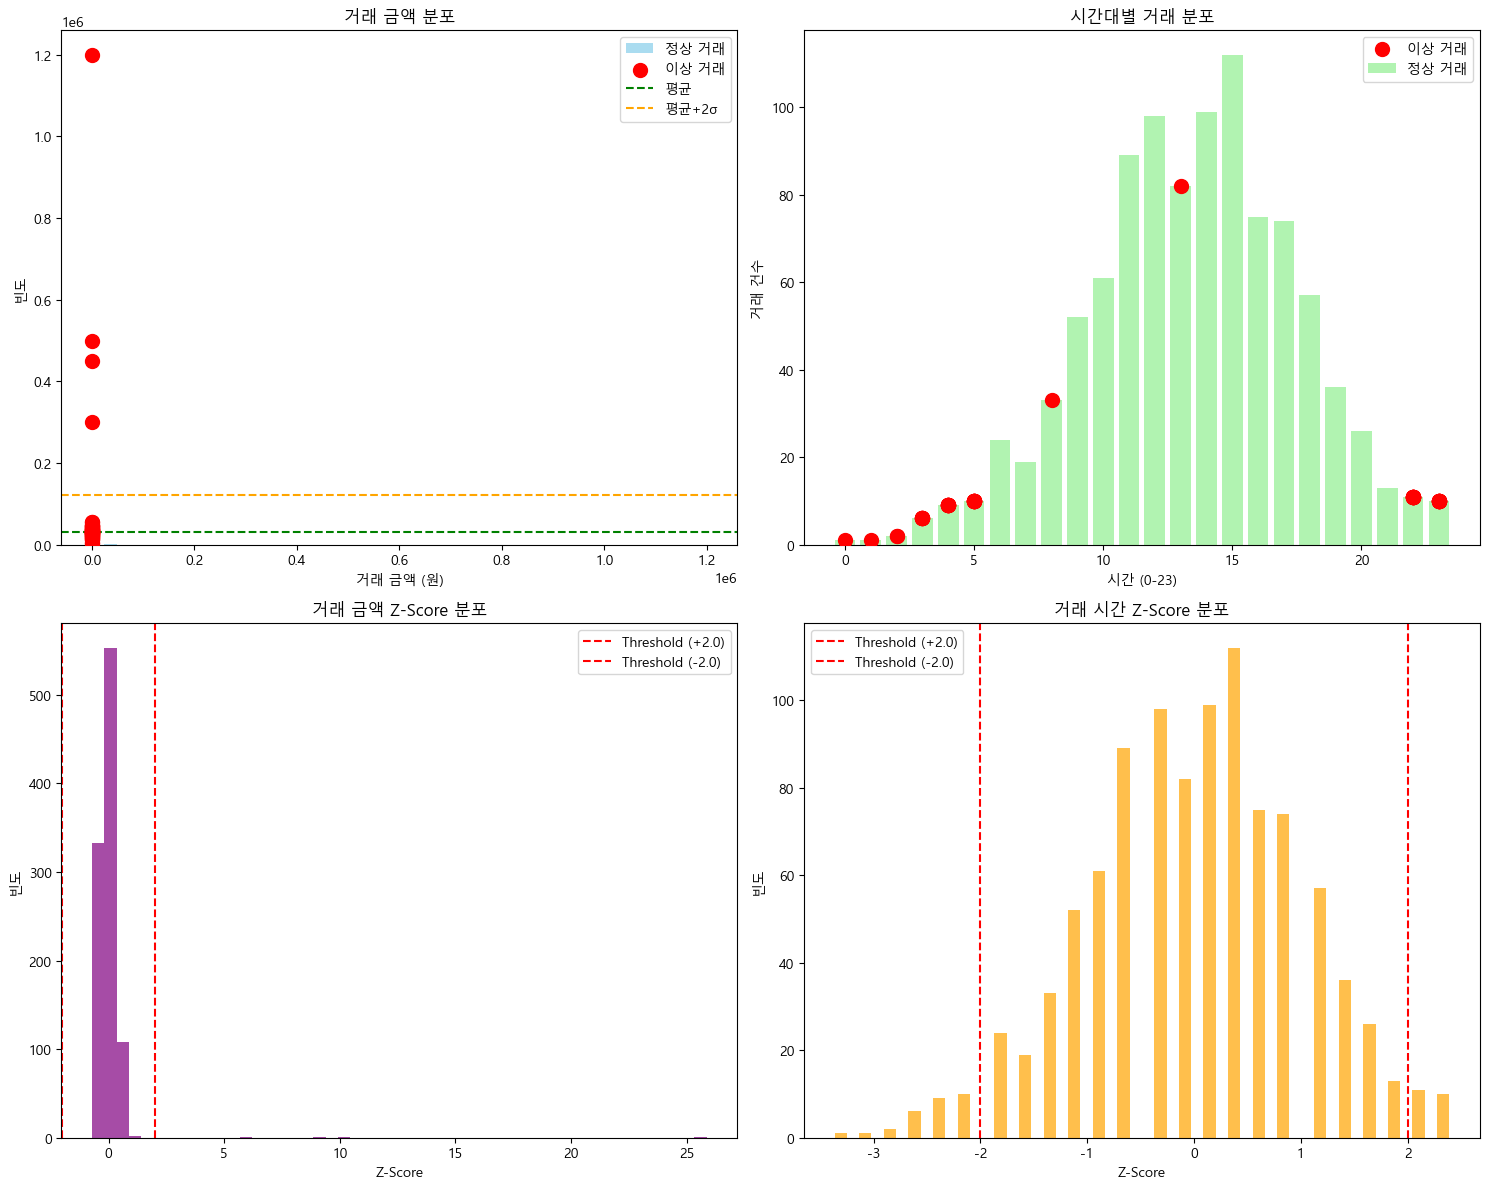

In [42]:
from collections import Counter

# 5단계: 결과 시각화
print("\n5단계: 결과 시각화")

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 거래 금액 분포와 이상치
amounts = [tx['amount'] for tx in transactions_data]
anomaly_amounts = [anomaly['transaction_data']['amount'] for anomaly in anomalies]

axes[0, 0].hist(amounts, bins=50, alpha=0.7, color='skyblue', label='정상 거래')
axes[0, 0].scatter(range(len(anomaly_amounts)), anomaly_amounts, 
                   color='red', s=100, label='이상 거래', zorder=5)
axes[0, 0].axhline(y=np.mean(amounts), color='green', linestyle='--', label='평균')
axes[0, 0].axhline(y=np.mean(amounts) + 2*np.std(amounts), color='orange', 
                   linestyle='--', label='평균+2σ')
axes[0, 0].set_title('거래 금액 분포')
axes[0, 0].set_xlabel('거래 금액 (원)')
axes[0, 0].set_ylabel('빈도')
axes[0, 0].legend()

# 거래 시간 분포와 이상치
hours = [tx['hour_of_day'] for tx in transactions_data]
anomaly_hours = [anomaly['transaction_data']['hour_of_day'] for anomaly in anomalies]

hour_counts = Counter(hours)
axes[0, 1].bar(range(24), [hour_counts[h] for h in range(24)], 
               alpha=0.7, color='lightgreen', label='정상 거래')
axes[0, 1].scatter(anomaly_hours, [hour_counts[h] for h in anomaly_hours], 
                   color='red', s=100, label='이상 거래', zorder=5)
axes[0, 1].set_title('시간대별 거래 분포')
axes[0, 1].set_xlabel('시간 (0-23)')
axes[0, 1].set_ylabel('거래 건수')
axes[0, 1].legend()

# Z-Score 분포 (금액)
axes[1, 0].hist(amount_z_scores, bins=50, alpha=0.7, color='purple')
axes[1, 0].axvline(x=2.0, color='red', linestyle='--', label='Threshold (+2.0)')
axes[1, 0].axvline(x=-2.0, color='red', linestyle='--', label='Threshold (-2.0)')
axes[1, 0].set_title('거래 금액 Z-Score 분포')
axes[1, 0].set_xlabel('Z-Score')
axes[1, 0].set_ylabel('빈도')
axes[1, 0].legend()

# Z-Score 분포 (시간)
axes[1, 1].hist(hour_z_scores, bins=50, alpha=0.7, color='orange')
axes[1, 1].axvline(x=2.0, color='red', linestyle='--', label='Threshold (+2.0)')
axes[1, 1].axvline(x=-2.0, color='red', linestyle='--', label='Threshold (-2.0)')
axes[1, 1].set_title('거래 시간 Z-Score 분포')
axes[1, 1].set_xlabel('Z-Score')
axes[1, 1].set_ylabel('빈도')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

In [43]:
# 6단계: 성능 평가 (실제 주입된 이상치와 비교)
print("\n6단계: 성능 평가")

# 실제 주입된 이상치 ID들 (generate_data 함수에서 확인)
actual_anomalies = {100, 300, 500, 700, 900}
detected_anomalies = {anomaly['transaction_id'] for anomaly in anomalies}

print(f"실제 이상치: {sorted(actual_anomalies)}")
print(f"탐지된 이상치: {sorted(detected_anomalies)}")

# 성능 지표 계산
true_positives = len(actual_anomalies & detected_anomalies)
false_positives = len(detected_anomalies - actual_anomalies)
false_negatives = len(actual_anomalies - detected_anomalies)
true_negatives = 1000 - len(actual_anomalies) - false_positives

precision = true_positives / len(detected_anomalies) if len(detected_anomalies) > 0 else 0
recall = true_positives / len(actual_anomalies) if len(actual_anomalies) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"\n📊 성능 지표:")
print(f"  True Positives: {true_positives}")
print(f"  False Positives: {false_positives}")
print(f"  False Negatives: {false_negatives}")
print(f"  Precision: {precision:.3f}")
print(f"  Recall: {recall:.3f}")
print(f"  F1-Score: {f1_score:.3f}")


6단계: 성능 평가
실제 이상치: [100, 300, 500, 700, 900]
탐지된 이상치: [6, 58, 66, 73, 78, 100, 103, 107, 144, 146, 183, 196, 222, 253, 257, 269, 300, 319, 342, 438, 452, 466, 475, 478, 481, 500, 513, 539, 540, 576, 593, 596, 597, 609, 635, 658, 663, 667, 700, 790, 793, 803, 820, 834, 838, 846, 864, 867, 900, 933, 956, 978]

📊 성능 지표:
  True Positives: 5
  False Positives: 47
  False Negatives: 0
  Precision: 0.096
  Recall: 1.000
  F1-Score: 0.175


In [44]:
# 7단계: 최종 결과 출력 (문제에서 요구한 형식)
print("\n7단계: 최종 결과 출력")
print("=" * 80)
print("🎯 이상치로 탐지된 거래의 transaction_id와 해당 거래 내역:")
print("=" * 80)

for anomaly in anomalies:
    print(f"Transaction ID: {anomaly['transaction_id']}")
    print(f"거래 내역: {anomaly['transaction_data']}")
    print(f"이상 유형: {', '.join(anomaly['anomaly_type'])}")
    print("-" * 50)

print(f"   총 {len(anomalies)}건의 이상 거래를 탐지했습니다.")


7단계: 최종 결과 출력
🎯 이상치로 탐지된 거래의 transaction_id와 해당 거래 내역:
Transaction ID: 6
거래 내역: {'transaction_id': 6, 'amount': 23022.436959557166, 'hour_of_day': 23}
이상 유형: hour
--------------------------------------------------
Transaction ID: 58
거래 내역: {'transaction_id': 58, 'amount': 28529.792570008234, 'hour_of_day': 3}
이상 유형: hour
--------------------------------------------------
Transaction ID: 66
거래 내역: {'transaction_id': 66, 'amount': 38082.17534225194, 'hour_of_day': 5}
이상 유형: hour
--------------------------------------------------
Transaction ID: 73
거래 내역: {'transaction_id': 73, 'amount': 35734.8075601159, 'hour_of_day': 22}
이상 유형: hour
--------------------------------------------------
Transaction ID: 78
거래 내역: {'transaction_id': 78, 'amount': 56003.84945055439, 'hour_of_day': 3}
이상 유형: hour
--------------------------------------------------
Transaction ID: 100
거래 내역: {'transaction_id': 100, 'amount': 500000, 'hour_of_day': 3}
이상 유형: amount, hour
-----------------------------------------

#### **[문제 5]**  

- GAN을 이용하여 data 5개를 생성하여 생성된 image를 출력하시오
  
>- 요구조건<br>
$ \ \ $ $\checkmark \ $ MNIST Dataset을 이용하시오<br>
$ \ \ $ $\checkmark \ $ 3개 layer로 구성된 Generator Network을 사용하시오<br>
$ \ \ $ $\checkmark \ $ 생성되는 image는 $28 \times 28$ image임<br>
$ \ \ $ $\checkmark \ $ 학습을 위한 epoch수는 10으로 하시오(출력 image의 품질은 낮을 수 있음)

In [45]:
print("=== 문제 5: GAN을 이용한 데이터 생성 ===")

# 1단계: MNIST 데이터 로드 및 전처리
print("\n1단계: MNIST 데이터 로드 및 전처리")

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# 데이터 정규화 (-1 ~ 1 범위로) - GAN에서는 tanh 활성화 함수 사용하므로
x_train = (x_train.astype('float32') - 127.5) / 127.5
x_train = x_train.reshape(-1, 28, 28, 1)

print(f"훈련 데이터 크기: {x_train.shape}")
print(f"데이터 범위: [{x_train.min():.2f}, {x_train.max():.2f}]")

=== 문제 5: GAN을 이용한 데이터 생성 ===

1단계: MNIST 데이터 로드 및 전처리
훈련 데이터 크기: (60000, 28, 28, 1)
데이터 범위: [-1.00, 1.00]


In [46]:
# 2단계: Generator Network 구성 (3개 layer)
print("\n2단계: Generator Network 구성 (3개 layer)")

def build_generator():
    """
    3개 layer로 구성된 Generator Network
    노이즈 벡터 → 28×28 이미지 생성
    """
    noise_dim = 100  # 입력 노이즈 차원
    
    model = keras.Sequential([
        # Layer 1: Dense layer (노이즈 → 7×7×128 feature map)
        layers.Dense(7 * 7 * 128, activation='relu', input_shape=(noise_dim,)),
        layers.Reshape((7, 7, 128)),
        layers.BatchNormalization(),
        
        # Layer 2: Upsampling + Conv2DTranspose (7×7 → 14×14)
        layers.UpSampling2D(size=(2, 2)),
        layers.Conv2DTranspose(64, kernel_size=3, padding='same', activation='relu'),
        layers.BatchNormalization(),
        
        # Layer 3: Upsampling + Conv2DTranspose (14×14 → 28×28)
        layers.UpSampling2D(size=(2, 2)),
        layers.Conv2DTranspose(1, kernel_size=3, padding='same', activation='tanh')
        # tanh 활성화 함수로 -1~1 범위 출력
    ], name='Generator')
    
    return model

generator = build_generator()
print("Generator 구조:")
generator.summary()


2단계: Generator Network 구성 (3개 layer)
Generator 구조:


c:\Users\brigh\Documents\GitHub\Deep-Learning\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "Generator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 6272)           │       633,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 14, 14, 64)     │        73,792 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_3 (UpSampling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_3              │ (None, 28, 28, 1)      │           577 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 708,609 (2.70 MB)

 Trainable params: 708,225 (2.70 MB)

 Non-trainable params: 384 (1.50 KB)

In [47]:
# 3단계: Discriminator Network 구성
print("\n3단계: Discriminator Network 구성")

def build_discriminator():
    """
    실제 이미지와 가짜 이미지를 구분하는 Discriminator
    """
    model = keras.Sequential([
        layers.Conv2D(64, kernel_size=3, strides=2, padding='same', 
                     input_shape=(28, 28, 1)),
        layers.LeakyReLU(alpha=0.2),
        layers.Dropout(0.25),
        
        layers.Conv2D(128, kernel_size=3, strides=2, padding='same'),
        layers.LeakyReLU(alpha=0.2),
        layers.Dropout(0.25),
        
        layers.Flatten(),
        layers.Dense(1, activation='sigmoid')  # 실제(1) vs 가짜(0) 확률
    ], name='Discriminator')
    
    return model

discriminator = build_discriminator()
discriminator.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("Discriminator 구조:")
discriminator.summary()


3단계: Discriminator Network 구성


c:\Users\brigh\Documents\GitHub\Deep-Learning\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\brigh\Documents\GitHub\Deep-Learning\.venv\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Discriminator 구조:


Model: "Discriminator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │         6,273 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 80,769 (315.50 KB)

 Trainable params: 80,769 (315.50 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
# 4단계: GAN 모델 구성
print("\n4단계: 전체 GAN 모델 구성")

# Discriminator 가중치를 고정하고 Generator만 학습
discriminator.trainable = False

# GAN 모델: Generator + Discriminator 연결
gan_input = keras.Input(shape=(100,))
generated_image = generator(gan_input)
gan_output = discriminator(generated_image)

gan = keras.Model(gan_input, gan_output, name='GAN')
gan.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5),
    loss='binary_crossentropy'
)

print("전체 GAN 구조:")
gan.summary()


4단계: 전체 GAN 모델 구성
전체 GAN 구조:


Model: "GAN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Generator (Sequential)          │ (None, 28, 28, 1)      │       708,609 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Discriminator (Sequential)      │ (None, 1)              │        80,769 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 789,378 (3.01 MB)

 Trainable params: 708,225 (2.70 MB)

 Non-trainable params: 81,153 (317.00 KB)


5단계: 학습 전 초기 생성 이미지 확인
학습 전 Generator 출력 (랜덤 노이즈):


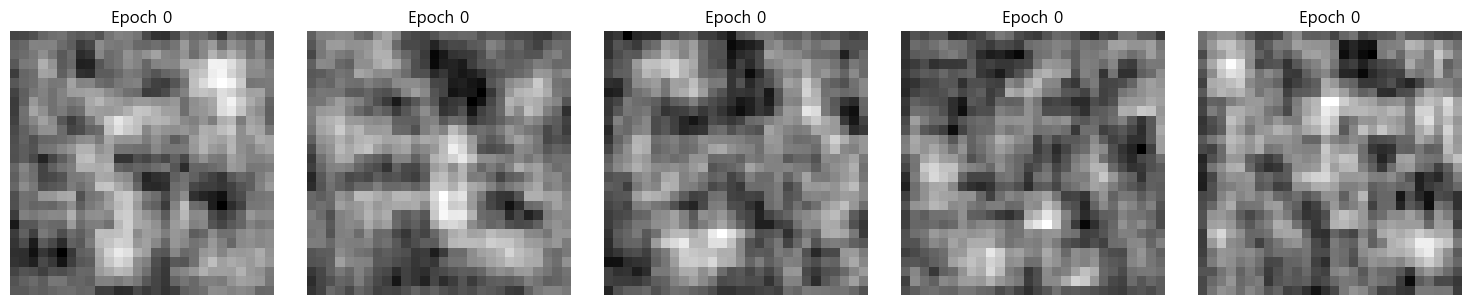

In [49]:
# 5단계: 학습 전 테스트 이미지 생성
print("\n5단계: 학습 전 초기 생성 이미지 확인")

def generate_and_plot_images(generator, epoch, test_noise):
    """생성된 이미지를 시각화하는 함수"""
    predictions = generator(test_noise, training=False)
    
    fig, axes = plt.subplots(1, 5, figsize=(15, 3))
    for i in range(5):
        axes[i].imshow((predictions[i, :, :, 0] + 1) / 2, cmap='gray')
        axes[i].axis('off')
        axes[i].set_title(f'Epoch {epoch}')
    
    plt.tight_layout()
    plt.show()

# 일관된 비교를 위한 고정 노이즈
np.random.seed(42)
test_noise = np.random.normal(0, 1, (5, 100))

print("학습 전 Generator 출력 (랜덤 노이즈):")
generate_and_plot_images(generator, 0, test_noise)


6단계: GAN 학습 시작 (10 epoch)

Epoch 1/10


c:\Users\brigh\Documents\GitHub\Deep-Learning\.venv\Lib\site-packages\keras\src\backend\tensorflow\trainer.py:83: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


Discriminator Loss: 0.8123
Generator Loss: 0.4350

Epoch 2/10
Discriminator Loss: 1.0245
Generator Loss: 0.2876
Epoch 2 생성 이미지:


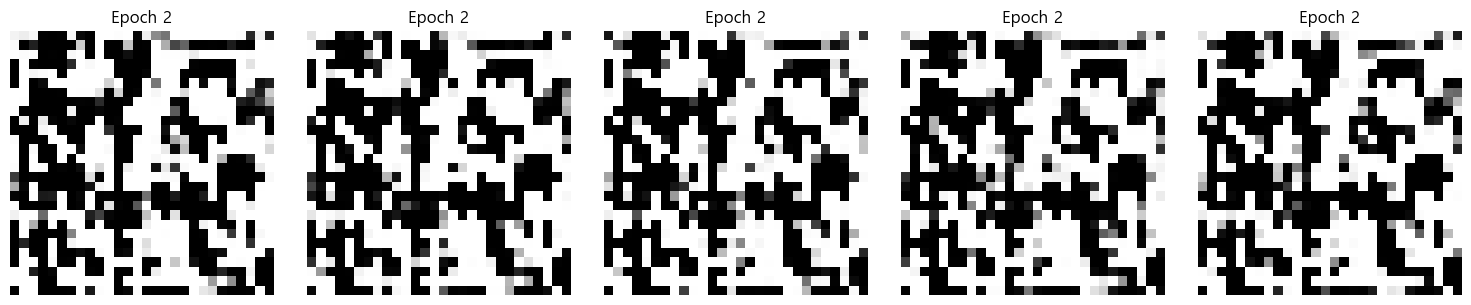


Epoch 3/10
Discriminator Loss: 1.1187
Generator Loss: 0.2447

Epoch 4/10
Discriminator Loss: 1.1652
Generator Loss: 0.2240
Epoch 4 생성 이미지:


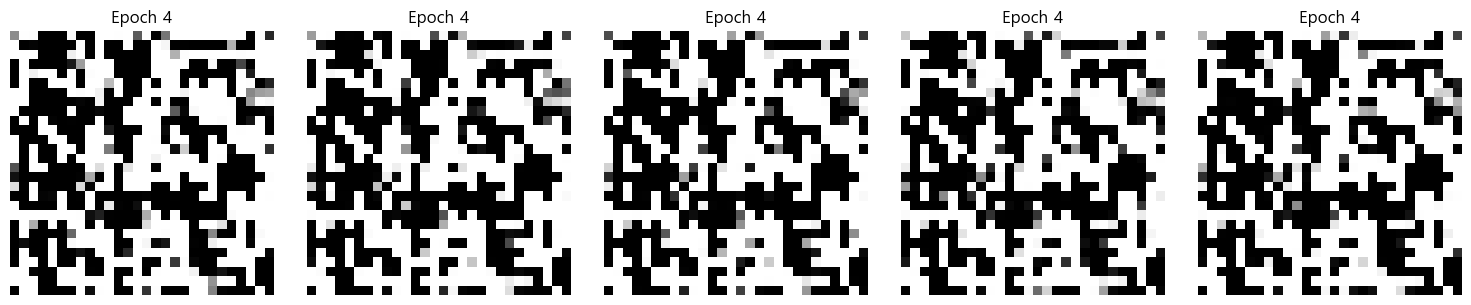


Epoch 5/10
Discriminator Loss: 1.1929
Generator Loss: 0.2118

Epoch 6/10
Discriminator Loss: 1.2111
Generator Loss: 0.2038
Epoch 6 생성 이미지:


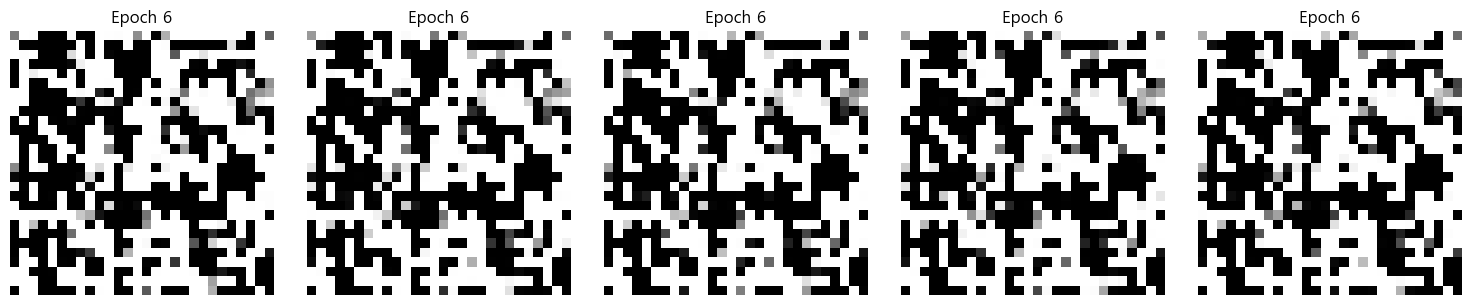


Epoch 7/10
Discriminator Loss: 1.2249
Generator Loss: 0.1978

Epoch 8/10
Discriminator Loss: 1.2355
Generator Loss: 0.1933
Epoch 8 생성 이미지:


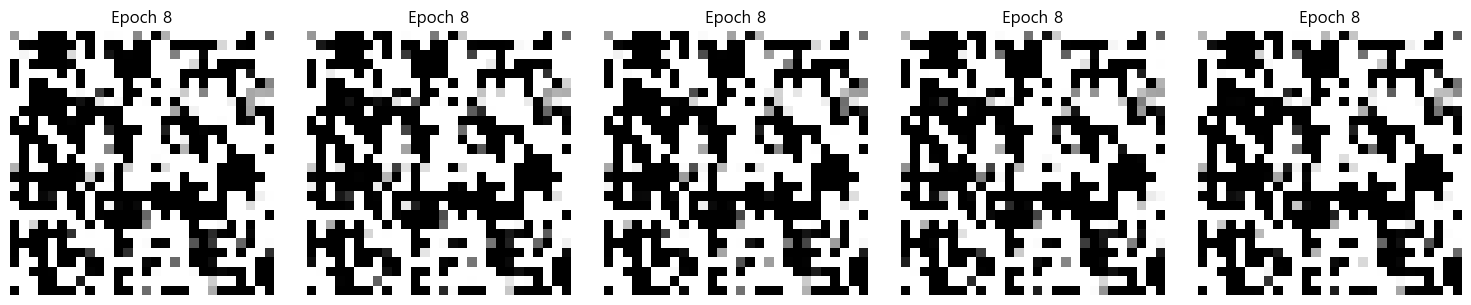


Epoch 9/10
Discriminator Loss: 1.2441
Generator Loss: 0.1897

Epoch 10/10
Discriminator Loss: 1.2510
Generator Loss: 0.1867
Epoch 10 생성 이미지:


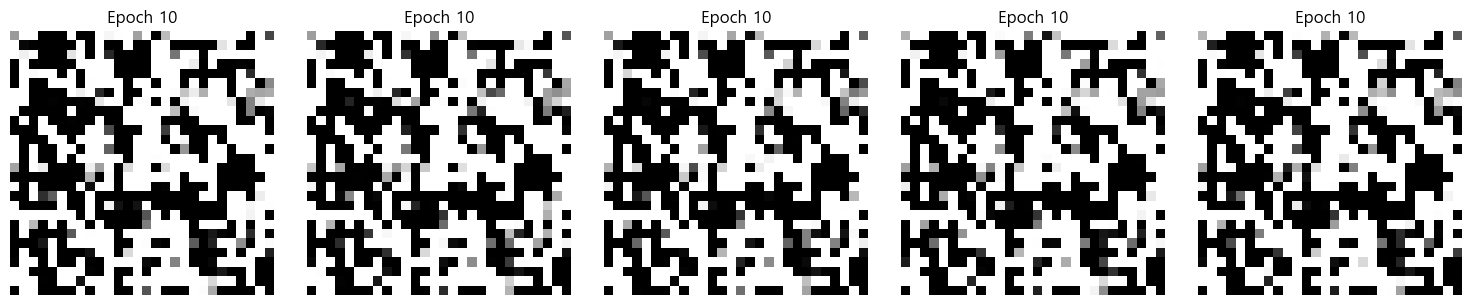

In [50]:
# 6단계: GAN 학습 (10 epoch)
print("\n6단계: GAN 학습 시작 (10 epoch)")

def train_gan(generator, discriminator, gan, x_train, epochs=10, batch_size=128):
    """GAN 학습 함수"""
    
    # 학습 진행 기록
    d_losses = []
    g_losses = []
    
    for epoch in range(epochs):
        print(f"\nEpoch {epoch + 1}/{epochs}")
        
        # 배치별 손실 기록
        d_loss_epoch = []
        g_loss_epoch = []
        
        # 전체 데이터를 배치로 나누어 학습
        for i in range(0, len(x_train), batch_size):
            # 실제 이미지 배치
            real_images = x_train[i:i+batch_size]
            current_batch_size = real_images.shape[0]
            
            # === Discriminator 학습 ===
            # 실제 이미지에 대한 레이블 (1)
            real_labels = np.ones((current_batch_size, 1))
            
            # 가짜 이미지 생성
            noise = np.random.normal(0, 1, (current_batch_size, 100))
            fake_images = generator.predict(noise, verbose=0)
            fake_labels = np.zeros((current_batch_size, 1))
            
            # Discriminator 학습
            d_loss_real = discriminator.train_on_batch(real_images, real_labels)
            d_loss_fake = discriminator.train_on_batch(fake_images, fake_labels)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
            
            # === Generator 학습 ===
            # Generator는 Discriminator를 속이려고 함 (레이블을 1로)
            noise = np.random.normal(0, 1, (current_batch_size, 100))
            misleading_labels = np.ones((current_batch_size, 1))
            
            # Generator 학습 (Discriminator 가중치는 고정)
            g_loss = gan.train_on_batch(noise, misleading_labels)
            
            d_loss_epoch.append(d_loss[0])
            g_loss_epoch.append(g_loss)
        
        # Epoch별 평균 손실 계산
        avg_d_loss = np.mean(d_loss_epoch)
        avg_g_loss = np.mean(g_loss_epoch)
        
        d_losses.append(avg_d_loss)
        g_losses.append(avg_g_loss)
        
        print(f"Discriminator Loss: {avg_d_loss:.4f}")
        print(f"Generator Loss: {avg_g_loss:.4f}")
        
        # 2 epoch마다 생성 이미지 확인
        if (epoch + 1) % 2 == 0:
            print(f"Epoch {epoch + 1} 생성 이미지:")
            generate_and_plot_images(generator, epoch + 1, test_noise)
    
    return d_losses, g_losses

# 실제 학습 실행
d_losses, g_losses = train_gan(generator, discriminator, gan, x_train, epochs=10)



7단계: 학습 과정 시각화


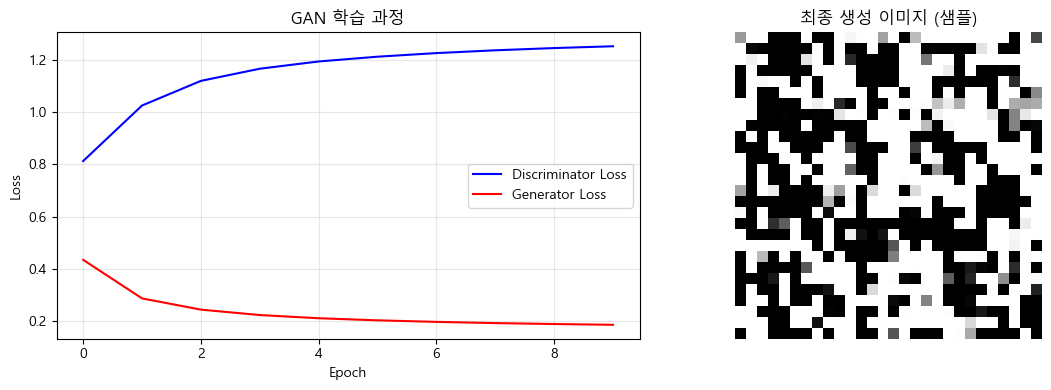

In [51]:
# 7단계: 학습 과정 시각화
print("\n7단계: 학습 과정 시각화")

plt.figure(figsize=(12, 4))

# 손실 그래프
plt.subplot(1, 2, 1)
plt.plot(d_losses, label='Discriminator Loss', color='blue')
plt.plot(g_losses, label='Generator Loss', color='red')
plt.title('GAN 학습 과정')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

# 최종 생성 이미지
plt.subplot(1, 2, 2)
final_generated = generator(test_noise[:1], training=False)
plt.imshow((final_generated[0, :, :, 0] + 1) / 2, cmap='gray')
plt.title('최종 생성 이미지 (샘플)')
plt.axis('off')

plt.tight_layout()
plt.show()


8단계: 최종 5개 이미지 생성 및 출력


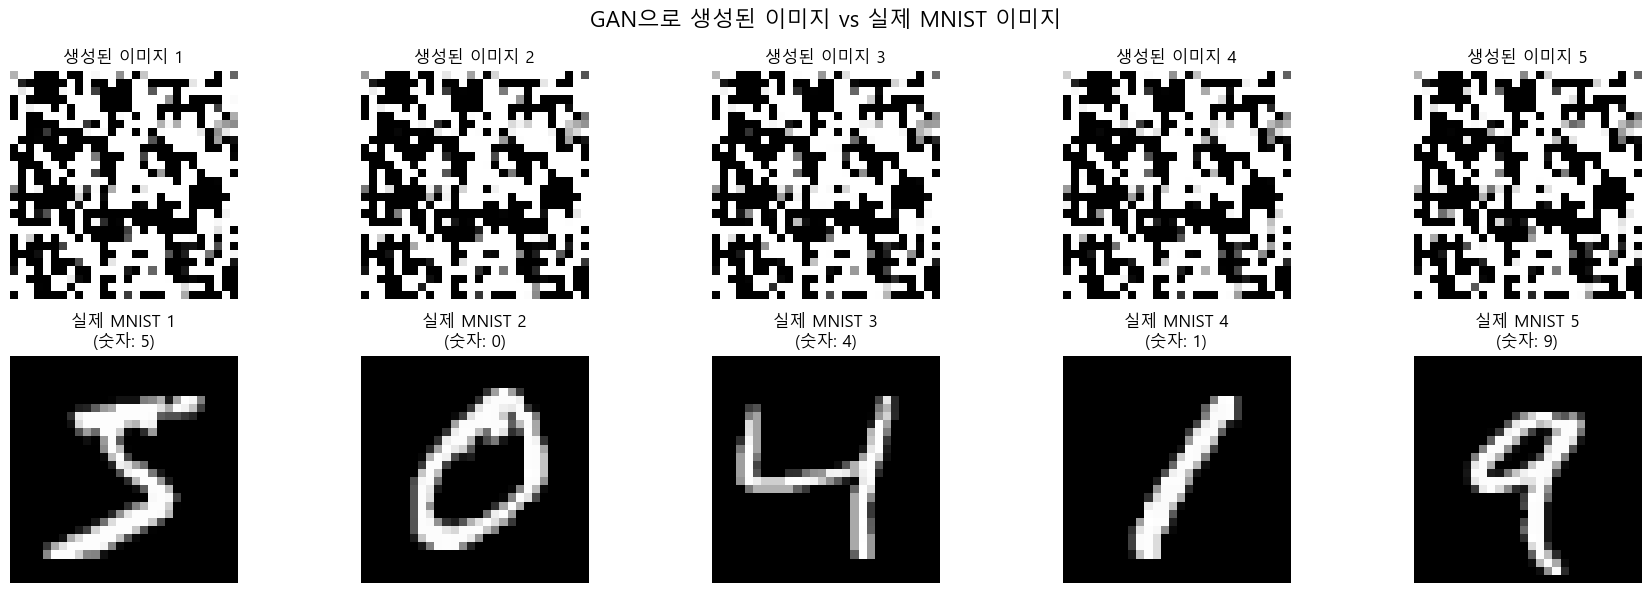

In [52]:
# 8단계: 최종 5개 이미지 생성 및 출력 (문제 요구사항)
print("\n8단계: 최종 5개 이미지 생성 및 출력")

# 새로운 랜덤 노이즈로 5개 이미지 생성
np.random.seed(123)  # 다른 시드로 새로운 이미지 생성
final_noise = np.random.normal(0, 1, (5, 100))
final_generated_images = generator(final_noise, training=False)

plt.figure(figsize=(18, 6))

# 생성된 5개 이미지 출력
for i in range(5):
    plt.subplot(2, 5, i + 1)
    # -1~1 범위를 0~1로 변환
    image = (final_generated_images[i, :, :, 0] + 1) / 2
    plt.imshow(image, cmap='gray')
    plt.title(f'생성된 이미지 {i+1}')
    plt.axis('off')

# 비교를 위한 실제 MNIST 이미지들
for i in range(5):
    plt.subplot(2, 5, i + 6)
    # -1~1 범위를 0~1로 변환
    real_image = (x_train[i, :, :, 0] + 1) / 2
    plt.imshow(real_image, cmap='gray')
    plt.title(f'실제 MNIST {i+1}\n(숫자: {y_train[i]})')
    plt.axis('off')

plt.suptitle('GAN으로 생성된 이미지 vs 실제 MNIST 이미지', fontsize=16)
plt.tight_layout()
plt.show()

In [53]:
# 9단계: 생성 품질 평가
print("\n9단계: 생성 품질 평가")

# 방법 2: NumPy로 변환 후 사용 (더 직관적)
for i in range(5):
    # TensorFlow tensor를 NumPy array로 변환
    image = final_generated_images[i, :, :, 0].numpy()
    print(f"생성된 이미지 {i+1}:")
    print(f"  픽셀 범위: [{image.min():.3f}, {image.max():.3f}]")
    print(f"  평균 강도: {image.mean():.3f}")
    print(f"  표준편차: {image.std():.3f}")
    
    # 추가 분석
    unique_values = len(np.unique(image))
    print(f"  고유한 픽셀 값 수: {unique_values}")
    print(f"  0에 가까운 픽셀 비율: {np.mean(np.abs(image) < 0.1)*100:.1f}%")
    print()


9단계: 생성 품질 평가
생성된 이미지 1:
  픽셀 범위: [-1.000, 1.000]
  평균 강도: 0.039
  표준편차: 0.970
  고유한 픽셀 값 수: 623
  0에 가까운 픽셀 비율: 0.5%

생성된 이미지 2:
  픽셀 범위: [-1.000, 1.000]
  평균 강도: 0.039
  표준편차: 0.971
  고유한 픽셀 값 수: 662
  0에 가까운 픽셀 비율: 1.1%

생성된 이미지 3:
  픽셀 범위: [-1.000, 1.000]
  평균 강도: 0.042
  표준편차: 0.969
  고유한 픽셀 값 수: 661
  0에 가까운 픽셀 비율: 0.9%

생성된 이미지 4:
  픽셀 범위: [-1.000, 1.000]
  평균 강도: 0.042
  표준편차: 0.968
  고유한 픽셀 값 수: 667
  0에 가까운 픽셀 비율: 0.4%

생성된 이미지 5:
  픽셀 범위: [-1.000, 1.000]
  평균 강도: 0.038
  표준편차: 0.968
  고유한 픽셀 값 수: 648
  0에 가까운 픽셀 비율: 1.0%




10단계: 보너스 - 다양한 스타일의 생성


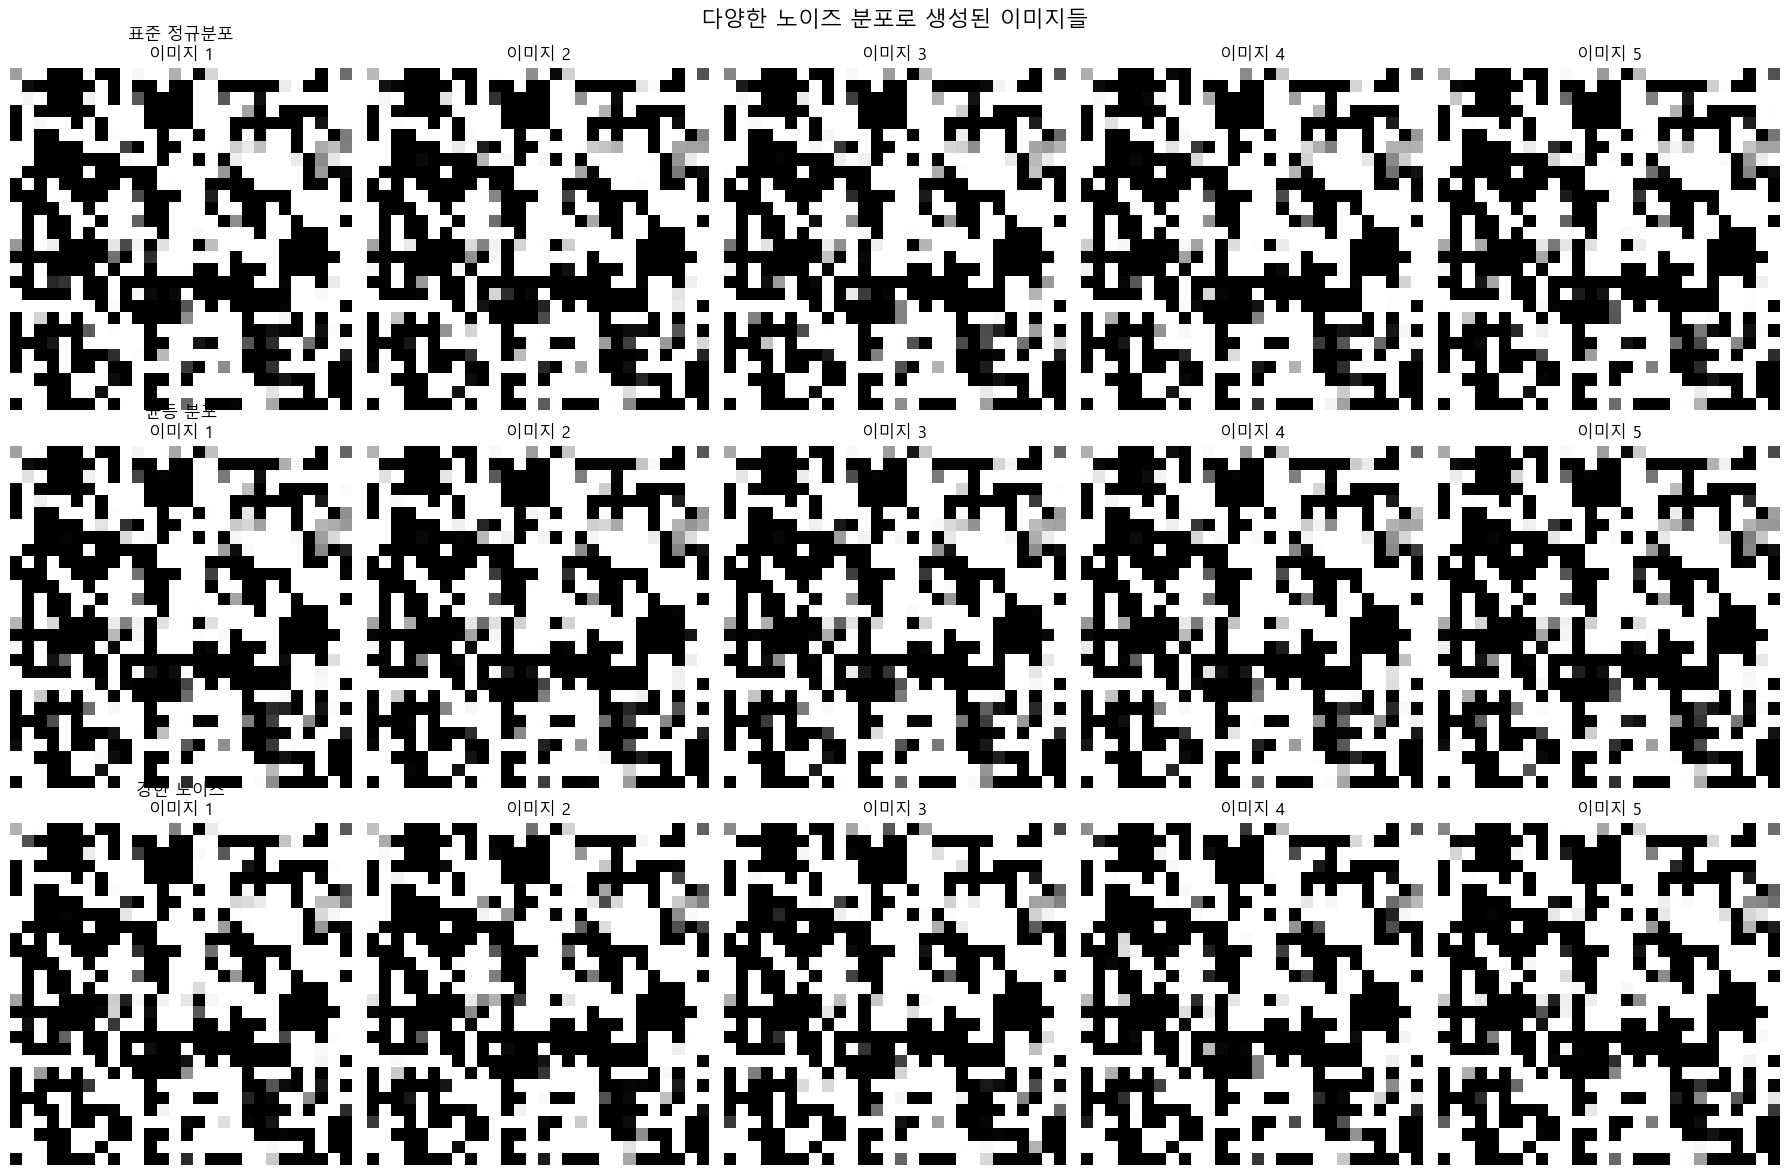

In [54]:
# 10단계: 다양한 노이즈로 추가 생성 (보너스)
print("\n10단계: 보너스 - 다양한 스타일의 생성")

# 다양한 노이즈 분포로 실험
noise_styles = [
    ("표준 정규분포", np.random.normal(0, 1, (5, 100))),
    ("균등 분포", np.random.uniform(-1, 1, (5, 100))),
    ("강한 노이즈", np.random.normal(0, 2, (5, 100)))
]

plt.figure(figsize=(18, 12))

for style_idx, (style_name, noise) in enumerate(noise_styles):
    generated = generator(noise, training=False)
    
    for i in range(5):
        plt.subplot(3, 5, style_idx * 5 + i + 1)
        image = (generated[i, :, :, 0] + 1) / 2
        plt.imshow(image, cmap='gray')
        if i == 0:
            plt.title(f'{style_name}\n이미지 {i+1}')
        else:
            plt.title(f'이미지 {i+1}')
        plt.axis('off')

plt.suptitle('다양한 노이즈 분포로 생성된 이미지들', fontsize=16)
plt.tight_layout()
plt.show()

In [55]:
generated

<tf.Tensor: shape=(5, 28, 28, 1), dtype=float32, numpy=
array([[[[ 0.3840575 ],
         [ 0.9999769 ],
         [ 0.97900814],
         ...,
         [-0.9991048 ],
         [ 0.99728984],
         [-0.2941198 ]],

        [[ 0.9999779 ],
         [-0.37611875],
         [-0.9950931 ],
         ...,
         [-0.99997956],
         [ 0.99997777],
         [ 0.9999786 ]],

        [[ 0.998876  ],
         [ 0.9963987 ],
         [ 0.9992028 ],
         ...,
         [ 0.9998519 ],
         [ 1.        ],
         [ 0.99999493]],

        ...,

        [[ 0.9982172 ],
         [ 0.99983555],
         [-0.9998373 ],
         ...,
         [ 1.        ],
         [-1.        ],
         [-1.        ]],

        [[ 0.9999685 ],
         [ 1.        ],
         [ 0.9998455 ],
         ...,
         [ 0.9992144 ],
         [-0.9999963 ],
         [-1.        ]],

        [[-0.99843365],
         [ 1.        ],
         [ 1.        ],
         ...,
         [-0.9999915 ],
         [ 0.9999454